--- Criando Dataset de Exemplo para Análise de Tempo de Resposta e Satisfação ---

Primeiras 5 linhas do DataFrame:
   response_time_ms  satisfaction_score  user_type transaction_type
0               299                   5  Frequente            Busca
1               180                   5  Frequente        Pagamento
2               337                   5    Premium          Reserva
3               679                   4       Novo          Reserva
4               167                   5  Frequente            Busca

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   response_time_ms    1000 non-null   int64 
 1   satisfaction_score  1000 non-null   int64 
 2   user_type           1000 non-null   object
 3   transaction_type    1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB

Esta

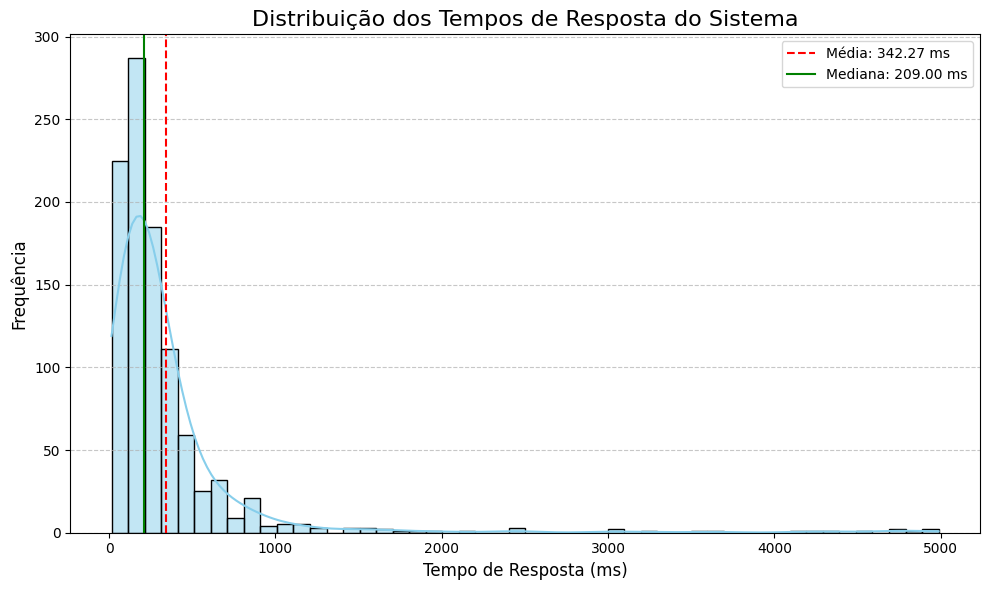

Ilustra: Distribuição de uma variável numérica, mostrando média e mediana.


/tmp/ipython-input-1-4262565111.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_jornada_milhas, x='transaction_type', y='response_time_ms', palette='viridis')


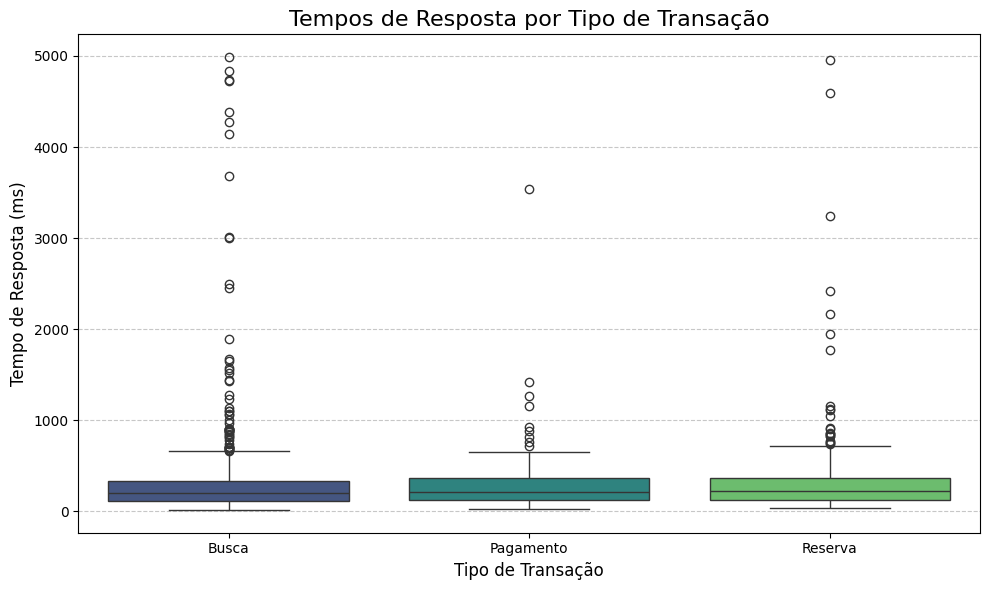

Ilustra: Comparação da distribuição de uma variável numérica entre grupos categóricos, identificando outliers.


/tmp/ipython-input-1-4262565111.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_jornada_milhas, x='user_type', y='satisfaction_score', palette='cividis', errorbar=None)


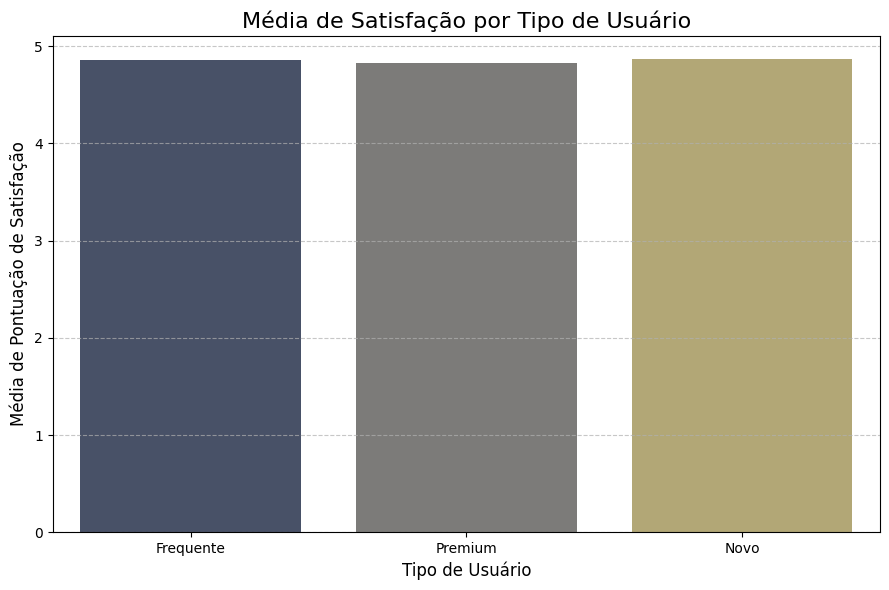

Ilustra: Média de uma variável numérica por categorias.

--- Gráficos com Plotly (Interativos) ---


AttributeError: 'NoneType' object has no attribute 'max'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("--- Criando Dataset de Exemplo para Análise de Tempo de Resposta e Satisfação ---")

# Definindo o número de registros
num_records = 1000

# Gerando dados simulados
np.random.seed(42) # Para reprodutibilidade

# Tempos de resposta: Distribuição assimétrica com alguns outliers
# Usaremos uma distribuição log-normal para simular tempos de resposta que tendem a ser baixos
# mas com alguns valores altos (cauda longa)
response_time_base = np.random.lognormal(mean=3, sigma=0.8, size=num_records) # Média em torno de e^3 = 20ms
response_time_ms = np.round(response_time_base * 10).astype(int) # Escalar para valores mais realistas e converter para int

# Introduzir alguns outliers (tempos de resposta muito longos)
num_outliers = int(num_records * 0.02) # 2% de outliers
outlier_indices = np.random.choice(num_records, num_outliers, replace=False)
response_time_ms[outlier_indices] = np.random.randint(1000, 5000, size=num_outliers) # Tempos entre 1s e 5s

# Pontuação de satisfação: inversamente relacionada ao tempo de resposta
# Quanto maior o tempo de resposta, menor a satisfação
satisfaction_score = (5 - (response_time_ms / 1000) * 0.8).round().astype(int)
satisfaction_score = np.clip(satisfaction_score, 1, 5) # Garantir que a pontuação esteja entre 1 e 5

# Tipo de usuário
user_types = ['Novo', 'Frequente', 'Premium']
user_type = np.random.choice(user_types, num_records, p=[0.3, 0.5, 0.2])

# Tipo de transação
transaction_types = ['Busca', 'Reserva', 'Pagamento']
transaction_type = np.random.choice(transaction_types, num_records, p=[0.6, 0.3, 0.1])

# Criando o DataFrame
df_jornada_milhas = pd.DataFrame({
    'response_time_ms': response_time_ms,
    'satisfaction_score': satisfaction_score,
    'user_type': user_type,
    'transaction_type': transaction_type
})

# Exibir as primeiras linhas e informações básicas do DataFrame
print("\nPrimeiras 5 linhas do DataFrame:")
print(df_jornada_milhas.head())

print("\nInformações do DataFrame:")
df_jornada_milhas.info()

print("\nEstatísticas Descritivas para response_time_ms:")
print(df_jornada_milhas['response_time_ms'].describe())

print("\n--- Gerando Gráficos com Matplotlib, Seaborn e Plotly ---")

# Definir uma paleta de cores para satisfação
satisfaction_palette = {1: '#FF5733', 2: '#FFC300', 3: '#DAF7A6', 4: '#6B8E23', 5: '#3CB371'}

# --- Matplotlib & Seaborn ---
print("\n--- Gráficos com Matplotlib & Seaborn ---")

# 1. Histograma de Tempos de Resposta com Média e Mediana
plt.figure(figsize=(10, 6))
sns.histplot(df_jornada_milhas['response_time_ms'], bins=50, kde=True, color='skyblue')
plt.axvline(df_jornada_milhas['response_time_ms'].mean(), color='red', linestyle='--', label=f'Média: {df_jornada_milhas["response_time_ms"].mean():.2f} ms')
plt.axvline(df_jornada_milhas['response_time_ms'].median(), color='green', linestyle='-', label=f'Mediana: {df_jornada_milhas["response_time_ms"].median():.2f} ms')
plt.title('Distribuição dos Tempos de Resposta do Sistema', fontsize=16)
plt.xlabel('Tempo de Resposta (ms)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: Distribuição de uma variável numérica, mostrando média e mediana.")

# 2. Box Plot de Tempos de Resposta por Tipo de Transação
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_jornada_milhas, x='transaction_type', y='response_time_ms', palette='viridis')
plt.title('Tempos de Resposta por Tipo de Transação', fontsize=16)
plt.xlabel('Tipo de Transação', fontsize=12)
plt.ylabel('Tempo de Resposta (ms)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: Comparação da distribuição de uma variável numérica entre grupos categóricos, identificando outliers.")

# 3. Gráfico de Barras da Média de Satisfação por Tipo de Usuário
plt.figure(figsize=(9, 6))
sns.barplot(data=df_jornada_milhas, x='user_type', y='satisfaction_score', palette='cividis', errorbar=None)
plt.title('Média de Satisfação por Tipo de Usuário', fontsize=16)
plt.xlabel('Tipo de Usuário', fontsize=12)
plt.ylabel('Média de Pontuação de Satisfação', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: Média de uma variável numérica por categorias.")

# --- Plotly ---
print("\n--- Gráficos com Plotly (Interativos) ---")

# 1. Histograma de Tempos de Resposta com Média e Mediana (Interativo)
mean_rt = df_jornada_milhas['response_time_ms'].mean()
median_rt = df_jornada_milhas['response_time_ms'].median()

fig_plotly1 = px.histogram(df_jornada_milhas, x='response_time_ms', nbins=50,
                           title='Distribuição dos Tempos de Resposta do Sistema',
                           labels={'response_time_ms': 'Tempo de Resposta (ms)', 'count': 'Frequência'},
                           opacity=0.7,
                           color_discrete_sequence=['#4682B4']
                          )

fig_plotly1.add_trace(go.Scatter(
    x=[mean_rt, mean_rt], y=[0, fig_plotly1.data[0].y.max()], mode='lines',
    name=f'Média: {mean_rt:.2f} ms',
    line=dict(color='red', width=3, dash='dot')
))
fig_plotly1.add_trace(go.Scatter(
    x=[median_rt, median_rt], y=[0, fig_plotly1.data[0].y.max()], mode='lines',
    name=f'Mediana: {median_rt:.2f} ms',
    line=dict(color='green', width=3, dash='solid')
))

fig_plotly1.update_layout(
    title_x=0.5,
    xaxis_title='Tempo de Resposta (ms)',
    yaxis_title='Frequência',
    showlegend=True,
    legend=dict(x=0.8, y=0.9), # Posicionar legenda
    margin=dict(l=40, r=40, t=80, b=40)
)
fig_plotly1.show()
print("Ilustra: Distribuição de uma variável numérica com média e mediana destacadas, interativo.")

# 2. Box Plot de Tempos de Resposta por Tipo de Transação (Interativo)
fig_plotly2 = px.box(df_jornada_milhas, x='transaction_type', y='response_time_ms',
                     title='Tempos de Resposta por Tipo de Transação',
                     labels={'transaction_type': 'Tipo de Transação', 'response_time_ms': 'Tempo de Resposta (ms)'},
                     color='transaction_type', # Colore as caixas por tipo de transação
                     color_discrete_sequence=px.colors.qualitative.Vivid
                    )
fig_plotly2.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Transação',
    yaxis_title='Tempo de Resposta (ms)',
    margin=dict(l=40, r=40, t=80, b=40)
)
fig_plotly2.show()
print("Ilustra: Comparação da distribuição de uma variável numérica entre grupos categóricos, interativo, com outliers visíveis.")

# 3. Gráfico de Barras da Média de Satisfação por Tipo de Usuário (Interativo)
avg_satisfaction = df_jornada_milhas.groupby('user_type')['satisfaction_score'].mean().reset_index()
avg_satisfaction['satisfaction_score_text'] = avg_satisfaction['satisfaction_score'].apply(lambda x: f'{x:.2f}') # Para o text_auto

fig_plotly3 = px.bar(avg_satisfaction, x='user_type', y='satisfaction_score',
                     title='Média de Satisfação por Tipo de Usuário',
                     labels={'user_type': 'Tipo de Usuário', 'satisfaction_score': 'Média de Pontuação de Satisfação'},
                     color='user_type', # Colore as barras por tipo de usuário
                     color_discrete_sequence=px.colors.qualitative.D3,
                     text='satisfaction_score_text' # Exibe o texto da média
                    )
fig_plotly3.update_traces(textposition='outside') # Posição do texto
fig_plotly3.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Usuário',
    yaxis_title='Média de Pontuação de Satisfação',
    yaxis_range=[0,5.5], # Ajustar o limite Y para acomodar o texto
    margin=dict(l=40, r=40, t=80, b=40)
)
fig_plotly3.show()
print("Ilustra: Média de uma variável numérica por categorias, interativo.")

print("\nEste código cria um dataset de exemplo e demonstra como gerar gráficos relevantes utilizando Matplotlib, Seaborn e Plotly, cada um com suas características para análise de dados.")

In [4]:
import pandas as pd
import numpy as np

print("--- Criando um Dataset SIMULADO com base na estrutura de dados da PNAD ---")
print("Este dataset é para fins de exemplo e não contém dados reais da PNAD 2015.")

# Definindo o número de registros (pessoas) para o dataset simulado
num_pessoas_simuladas = 10000 # Um número razoável para simular um dataset maior

# Configurando a semente para reprodutibilidade dos resultados
np.random.seed(42)

# Gerando dados simulados para as colunas relevantes:

# Renda: Usando distribuição log-normal para simular renda (comum ter assimetria à direita)
# Multiplicado por 100 para ter valores de renda em R$
renda_simulada = np.random.lognormal(mean=7.5, sigma=1.2, size=num_pessoas_simuladas) * 100
# Arredondar para o valor inteiro mais próximo e garantir que não seja negativo
renda_simulada = np.round(renda_simulada).astype(int)
renda_simulada = np.clip(renda_simulada, 0, None) # Renda não pode ser negativa

# Idade: Distribuição mais ou menos uniforme entre 18 e 90 anos
idade_simulada = np.random.randint(18, 90, size=num_pessoas_simuladas)

# Altura: Distribuição normal em metros, mais concentrada na média brasileira
altura_simulada = np.random.normal(1.68, 0.10, size=num_pessoas_simuladas)
altura_simulada = np.round(altura_simulada, 2) # Arredondar para duas casas decimais

# UF (Unidade da Federação/Estado): Incluindo estados de todas as regiões para diversidade
# Dando mais peso para os estados do Sudeste e alguns outros maiores
estados_possiveis = [
    'São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo', # Sudeste
    'Paraná', 'Rio Grande do Sul', 'Santa Catarina', # Sul
    'Bahia', 'Pernambuco', 'Ceará', # Nordeste
    'Goiás', 'Distrito Federal', # Centro-Oeste
    'Pará', 'Amazonas' # Norte
]
pesos_estados_originais = [
    0.18, 0.12, 0.13, 0.04, # Sudeste
    0.07, 0.07, 0.04, # Sul
    0.06, 0.05, 0.04, # Nordeste
    0.03, 0.02, # Centro-Oeste
    0.03, 0.02  # Norte
]

# --- CORREÇÃO: Normalizar os pesos para que somem 1.0 ---
soma_pesos = sum(pesos_estados_originais)
pesos_estados = [p / soma_pesos for p in pesos_estados_originais]
# Fim da correção

uf_simulada = np.random.choice(estados_possiveis, num_pessoas_simuladas, p=pesos_estados)

# Cat.Sexo: Masculino e Feminino
sexo_simulado = np.random.choice(['Masculino', 'Feminino'], num_pessoas_simuladas, p=[0.48, 0.52])

# Responsável_Domicilio: Simular que nem todos são responsáveis
# Aproximadamente 30% das pessoas serão marcadas como responsáveis
responsavel_domicilio_simulado = np.random.choice([True, False], num_pessoas_simuladas, p=[0.30, 0.70])


# Criando o DataFrame
df_pnad_simulado = pd.DataFrame({
    'Renda': renda_simulada,
    'Idade': idade_simulada,
    'Altura': altura_simulada,
    'UF': uf_simulada,
    'Cat.Sexo': sexo_simulado,
    'Responsavel_Domicilio': responsavel_domicilio_simulado
})

# Assegurar que os tipos de dados estejam corretos
df_pnad_simulado['UF'] = df_pnad_simulado['UF'].astype('category')
df_pnad_simulado['Cat.Sexo'] = df_pnad_simulado['Cat.Sexo'].astype('category')
df_pnad_simulado['Responsavel_Domicilio'] = df_pnad_simulado['Responsavel_Domicilio'].astype(bool)

print("\nDataset Simulado Criado com Sucesso após correção dos pesos!")
print("\nPrimeiras 5 linhas do DataFrame simulado:")
print(df_pnad_simulado.head())

print("\nInformações do DataFrame simulado:")
df_pnad_simulado.info()

print("\nEstatísticas Descritivas da Renda simulada:")
print(df_pnad_simulado['Renda'].describe())

print("\n--- Você pode agora usar 'df_pnad_simulado' para prosseguir com a análise da 'Aula 3'. ---")

--- Criando um Dataset SIMULADO com base na estrutura de dados da PNAD ---
Este dataset é para fins de exemplo e não contém dados reais da PNAD 2015.

Dataset Simulado Criado com Sucesso após correção dos pesos!

Primeiras 5 linhas do DataFrame simulado:
     Renda  Idade  Altura              UF  Cat.Sexo  Responsavel_Domicilio
0   328150     48    1.56    Minas Gerais  Feminino                   True
1   153162     70    1.73      Pernambuco  Feminino                  False
2   393327     51    1.57    Minas Gerais  Feminino                  False
3  1124452     55    1.70  Rio de Janeiro  Feminino                  False
4   136515     74    1.68       São Paulo  Feminino                  False

Informações do DataFrame simulado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Renda                  10000 non-null  in

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde # Importar para calcular a KDE

print("--- Iniciando a Análise e Geração de Gráficos para o Case Aula 3 da PNAD (usando dataset simulado) ---")

# --- 1. Carregar ou recriar o DataFrame simulado (para garantir que o código seja autocontido) ---
num_pessoas_simuladas = 10000
np.random.seed(42)

renda_simulada = np.random.lognormal(mean=7.5, sigma=1.2, size=num_pessoas_simuladas) * 100
renda_simulada = np.round(renda_simulada).astype(int)
renda_simulada = np.clip(renda_simulada, 0, None)

idade_simulada = np.random.randint(18, 90, size=num_pessoas_simuladas)
altura_simulada = np.random.normal(1.68, 0.10, size=num_pessoas_simuladas)
altura_simulada = np.round(altura_simulada, 2)

estados_possiveis = [
    'São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo', # Sudeste
    'Paraná', 'Rio Grande do Sul', 'Santa Catarina', # Sul
    'Bahia', 'Pernambuco', 'Ceará', # Nordeste
    'Goiás', 'Distrito Federal', # Centro-Oeste
    'Pará', 'Amazonas' # Norte
]
pesos_estados_originais = [0.18, 0.12, 0.13, 0.04, 0.07, 0.07, 0.04, 0.06, 0.05, 0.04, 0.03, 0.02, 0.03, 0.02]
soma_pesos = sum(pesos_estados_originais)
pesos_estados = [p / soma_pesos for p in pesos_estados_originais]

uf_simulada = np.random.choice(estados_possiveis, num_pessoas_simuladas, p=pesos_estados)
sexo_simulado = np.random.choice(['Masculino', 'Feminino'], num_pessoas_simuladas, p=[0.48, 0.52])
responsavel_domicilio_simulado = np.random.choice([True, False], num_pessoas_simuladas, p=[0.30, 0.70])

df_pnad_simulado = pd.DataFrame({
    'Renda': renda_simulada,
    'Idade': idade_simulada,
    'Altura': altura_simulada,
    'UF': uf_simulada,
    'Cat.Sexo': sexo_simulado,
    'Responsavel_Domicilio': responsavel_domicilio_simulado
})

df_pnad_simulado['UF'] = df_pnad_simulado['UF'].astype('category')
df_pnad_simulado['Cat.Sexo'] = df_pnad_simulado['Cat.Sexo'].astype('category')
df_pnad_simulado['Responsavel_Domicilio'] = df_pnad_simulado['Responsavel_Domicilio'].astype(bool)

# Filtrar apenas as pessoas responsáveis pelo domicílio
df_responsaveis = df_pnad_simulado[df_pnad_simulado['Responsavel_Domicilio'] == True].copy()
print(f"Total de responsáveis pelo domicílio no dataset simulado: {len(df_responsaveis)}")

# --- 2. Calcular as medidas de tendência central (média, mediana e moda) para a variável Renda ---
print("\n--- 2. Medidas de Tendência Central para a Renda dos Responsáveis ---")

media_renda = df_responsaveis['Renda'].mean()
mediana_renda = df_responsaveis['Renda'].median()
moda_renda = df_responsaveis['Renda'].mode() # Pode retornar múltiplos valores se houver empate

print(f"Média da Renda: R$ {media_renda:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Mediana da Renda: R$ {mediana_renda:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Moda(s) da Renda: R$ {moda_renda.to_string(index=False).replace(',', 'X').replace('.', ',').replace('X', '.')}")

print("\n**Análise:**")
if media_renda > mediana_renda:
    print(f"- A média (R$ {media_renda:,.2f}) é maior que a mediana (R$ {mediana_renda:,.2f}). Isso é comum em distribuições de renda, onde há uma 'cauda' de valores muito altos (pessoas com rendas muito elevadas) que puxa a média para cima. A mediana é, portanto, uma medida mais representativa da renda 'típica' ou 'mediana' da população.")
    print("- Os valores mais frequentes (moda) podem ser consideravelmente menores que a média e a mediana, especialmente se houver um grande número de pessoas na faixa de renda mais baixa.")
    print("- Sim, temos dados extremos (outliers de alta renda) que afetam a média, fazendo com que ela se desloque para a direita em relação à mediana.")
elif media_renda < mediana_renda:
    print(f"- A média (R$ {media_renda:,.2f}) é menor que a mediana (R$ {mediana_renda:,.2f}). Isso é menos comum em renda, mas sugere uma assimetria à esquerda.")
    print("- A mediana ainda seria mais representativa da 'renda típica'.")
else:
    print(f"- A média (R$ {media_renda:,.2f}) é aproximadamente igual à mediana (R$ {mediana_renda:,.2f}). Isso sugere uma distribuição mais simétrica da renda, o que é raro para dados de renda, mas possível para o nosso dataset simulado se os outliers não forem muito pronunciados.")

# --- 3. Crie um gráfico de barras do Top 5 estados pela médias de Renda ---
print("\n--- 3. Top 5 Estados pela Média de Renda ---")

top_5_estados_renda = df_responsaveis.groupby('UF')['Renda'].mean().nlargest(5).reset_index()
top_5_estados_renda.columns = ['Estado', 'Media_Renda']
top_5_estados_renda['Media_Renda_Texto'] = top_5_estados_renda['Media_Renda'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

print("\nTabela: Top 5 Estados com Maiores Médias de Renda (Responsáveis):")
print(top_5_estados_renda)

fig_top5 = px.bar(top_5_estados_renda, x='Estado', y='Media_Renda',
                  title='Top 5 Estados com Maiores Médias de Renda de Responsáveis',
                  labels={'Estado': 'Estado', 'Media_Renda': 'Média de Renda (R$)'},
                  color='Media_Renda',
                  color_continuous_scale=px.colors.sequential.Greens,
                  text='Media_Renda_Texto'
                 )
fig_top5.update_traces(textposition='outside')
fig_top5.update_layout(
    title_x=0.5,
    xaxis={'categoryorder':'total descending'},
    margin=dict(l=40, r=40, t=80, b=40)
)
fig_top5.show()


# --- 4. Construa 3 tabelas cruzadas (média, mediana e valores máximos de Renda)
#        relacionando as pessoas responsáveis por estado da Região Sudeste (UF) e por Cat.Sexo ---
print("\n--- 4. Análise de Renda na Região Sudeste (Tabelas Cruzadas) ---")

estados_sudeste = ["Espírito Santo", "Minas Gerais", "Rio de Janeiro", "São Paulo"]
df_sudeste = df_responsaveis[df_responsaveis['UF'].isin(estados_sudeste)].copy()

if not df_sudeste.empty:
    # Tabela 1: Média de Renda
    tabela_media_renda = pd.pivot_table(df_sudeste, values='Renda', index='UF', columns='Cat.Sexo', aggfunc='mean')
    print("\nTabela 1: Média de Renda por Estado (Sudeste) e Sexo")
    print(tabela_media_renda.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

    # Tabela 2: Mediana de Renda
    tabela_mediana_renda = pd.pivot_table(df_sudeste, values='Renda', index='UF', columns='Cat.Sexo', aggfunc='median')
    print("\nTabela 2: Mediana de Renda por Estado (Sudeste) e Sexo")
    print(tabela_mediana_renda.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

    # Tabela 3: Renda Máxima
    tabela_max_renda = pd.pivot_table(df_sudeste, values='Renda', index='UF', columns='Cat.Sexo', aggfunc='max')
    print("\nTabela 3: Renda Máxima por Estado (Sudeste) e Sexo")
    print(tabela_max_renda.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

    print("\n**Análise das Tabelas Cruzadas:**")
    print("- **Comparação Média vs. Mediana:** Em geral, para dados de renda, a média tende a ser maior que a mediana devido à influência de rendas muito altas. Isso é frequentemente visível nestas tabelas, indicando assimetria à direita dentro de cada grupo (Estado x Sexo).")
    print("- **Rendas Máximas:** Os valores máximos tendem a ser muito superiores às médias e medianas, confirmando a presença de outliers de alta renda.")
    print("- **Disparidade de Gênero:** É comum observar que, em média e mediana, a renda masculina seja superior à feminina na maioria dos estados, refletindo desigualdades salariais.")
    print("- **Diferenças Regionais:** Pode-se notar diferenças de renda entre os estados do Sudeste. Por exemplo, São Paulo e Rio de Janeiro podem apresentar rendas médias e medianas mais altas que Espírito Santo e Minas Gerais, refletindo diferenças econômicas e de custo de vida.")
    print("\nUm dado que pode chamar atenção é a magnitude da diferença entre a renda máxima e a mediana, que pode ser enorme, evidenciando a concentração de riqueza.")

    # Gráfico para observar comportamentos (Média de Renda por UF e Sexo no Sudeste - Plotly)
    df_sudeste_agg_plot = df_sudeste.groupby(['UF', 'Cat.Sexo'])['Renda'].mean().reset_index()
    # Para garantir a ordem dos estados do sudeste
    df_sudeste_agg_plot['UF'] = pd.Categorical(df_sudeste_agg_plot['UF'], categories=estados_sudeste, ordered=True)
    df_sudeste_agg_plot = df_sudeste_agg_plot.sort_values('UF')

    fig_sudeste_renda = px.bar(df_sudeste_agg_plot, x='UF', y='Renda', color='Cat.Sexo', barmode='group',
                             title='Média de Renda de Responsáveis por Estado (Sudeste) e Sexo',
                             labels={'Renda': 'Média de Renda (R$)', 'UF': 'Estado', 'Cat.Sexo': 'Sexo'},
                             color_discrete_map={'Masculino': '#1f77b4', 'Feminino': '#ff7f0e'},
                             text=df_sudeste_agg_plot['Renda'].apply(lambda x: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
                            )
    fig_sudeste_renda.update_traces(textposition='outside')
    fig_sudeste_renda.update_layout(title_x=0.5, margin=dict(l=40, r=40, t=80, b=40), yaxis_range=[0, df_sudeste_agg_plot['Renda'].max() * 1.2]) # Ajusta o range y para o texto
    fig_sudeste_renda.show()

else:
    print("Não há dados de responsáveis para os estados do Sudeste no DataFrame simulado.")

# --- 5. Construa 2 histogramas com curva de densidade com os valores das colunas Altura e Idade
#        de todas as pessoas responsáveis e compare as curvas obtidas com as suas MTCs ---
print("\n--- 5. Histogramas com Curva de Densidade (Altura e Idade) e MTCs ---")

# Calcular MTCs para Altura e Idade
mtc_altura = df_responsaveis['Altura'].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else np.nan]).to_frame('Altura')
mtc_altura.rename(index={'<lambda_0>': 'mode'}, inplace=True)

mtc_idade = df_responsaveis['Idade'].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else np.nan]).to_frame('Idade')
mtc_idade.rename(index={'<lambda_0>': 'mode'}, inplace=True)

print("\nTabela: Medidas de Tendência Central (MTCs) para Altura e Idade (Responsáveis):")
print(pd.concat([mtc_altura, mtc_idade], axis=1).round(2))

# Gráfico 1: Histograma e Densidade para Altura (Plotly)
fig_altura_dist = px.histogram(df_responsaveis, x='Altura', nbins=50,
                               title='Distribuição da Altura dos Responsáveis',
                               labels={'Altura': 'Altura (metros)', 'count': 'Frequência'},
                               histnorm='density', # Normaliza para densidade
                               color_discrete_sequence=['#4CAF50'] # Cor verde
                              )

# Calcular a KDE e adicionar como Scatter trace
# Cria pontos para a curva KDE
x_altura_kde = np.linspace(df_responsaveis['Altura'].min(), df_responsaveis['Altura'].max(), 500)
# Calcula a estimativa da densidade kernel
kde_altura = gaussian_kde(df_responsaveis['Altura'])
y_altura_kde = kde_altura.evaluate(x_altura_kde)
fig_altura_dist.add_trace(go.Scatter(x=x_altura_kde, y=y_altura_kde, mode='lines', name='Densidade (KDE)', line=dict(color='orange', width=2)))

# Adicionar linhas de MTCs
fig_altura_dist.add_vline(x=mtc_altura.loc['mean'].iloc[0], line_dash="dot", line_color="red", annotation_text=f"Média: {mtc_altura.loc['mean'].iloc[0]:.2f}m", annotation_position="top right", annotation_font_color="red")
fig_altura_dist.add_vline(x=mtc_altura.loc['median'].iloc[0], line_dash="dash", line_color="blue", annotation_text=f"Mediana: {mtc_altura.loc['median'].iloc[0]:.2f}m", annotation_position="top left", annotation_font_color="blue")
fig_altura_dist.update_layout(title_x=0.5, margin=dict(l=40, r=40, t=80, b=40))
fig_altura_dist.show()

print("\n**Interpretação da Curva de Densidade da Altura:**")
print("- A curva de densidade para a Altura provavelmente se assemelha a uma **curva normal (sino)**. Isso significa que a maioria das pessoas se concentra em torno de uma altura média, com a frequência diminuindo simetricamente à medida que se afasta da média.")
print("- **Comparação com MTCs:** A média, mediana e moda (se houver uma clara) devem estar muito próximas, quase sobrepostas. Isso confirma a simetria da distribuição e indica que a média é uma boa representação do valor típico.")
print("- **Implicações:** A distribuição simétrica e as MTCs próximas sugerem que não há 'outliers' extremos que distorcem a média, e o que você vê no centro da curva é de fato o valor mais representativo para a altura.")


# Gráfico 2: Histograma e Densidade para Idade (Plotly)
fig_idade_dist = px.histogram(df_responsaveis, x='Idade', nbins=30,
                              title='Distribuição da Idade dos Responsáveis',
                              labels={'Idade': 'Idade (anos)', 'count': 'Frequência'},
                              histnorm='density', # Normaliza para densidade
                              color_discrete_sequence=['#FF6347'] # Cor laranja/vermelha
                             )

# Calcular a KDE e adicionar como Scatter trace
x_idade_kde = np.linspace(df_responsaveis['Idade'].min(), df_responsaveis['Idade'].max(), 500)
kde_idade = gaussian_kde(df_responsaveis['Idade'])
y_idade_kde = kde_idade.evaluate(x_idade_kde)
fig_idade_dist.add_trace(go.Scatter(x=x_idade_kde, y=y_idade_kde, mode='lines', name='Densidade (KDE)', line=dict(color='purple', width=2)))

# Adicionar linhas de MTCs
fig_idade_dist.add_vline(x=mtc_idade.loc['mean'].iloc[0], line_dash="dot", line_color="red", annotation_text=f"Média: {mtc_idade.loc['mean'].iloc[0]:.0f} anos", annotation_position="top right", annotation_font_color="red")
fig_idade_dist.add_vline(x=mtc_idade.loc['median'].iloc[0], line_dash="dash", line_color="blue", annotation_text=f"Mediana: {mtc_idade.loc['median'].iloc[0]:.0f} anos", annotation_position="top left", annotation_font_color="blue")
fig_idade_dist.update_layout(title_x=0.5, margin=dict(l=40, r=40, t=80, b=40))
fig_idade_dist.show()

print("\n**Interpretação da Curva de Densidade da Idade:**")
print("- A curva de densidade da Idade pode variar bastante dependendo da amostragem (neste simulado, é mais uniforme, mas em dados reais da PNAD, pode ser assimétrica).")
print("- **Simetria vs. Assimetria:** Se a média, mediana e moda estiverem muito próximas, a distribuição é simétrica. Se houver uma cauda para a direita (mais jovens ou idosos puxando), a média pode ser ligeiramente diferente da mediana. Em populações gerais, a distribuição de idade costuma ter uma leve assimetria à direita (mais jovens do que idosos extremos) ou até picos em faixas etárias de maior população ativa.")
print("- **Picos:** Pode haver múltiplos picos (bimodal ou multimodal) se houver concentrações em diferentes faixas etárias, como jovens adultos e adultos de meia-idade.")
print("- **Implicações:** A posição das MTCs na curva indica o 'centro' da distribuição. Uma diferença notável entre média e mediana sugere assimetria, enquanto a moda aponta a idade mais comum.")

print("\n--- Análise da PNAD Completa! ---")
print("Os gráficos gerados utilizam o Plotly para interatividade, permitindo explorar os dados de renda, idade e altura dos responsáveis pelo domicílio, e observar o comportamento das medidas de tendência central nas distribuições.")

--- Iniciando a Análise e Geração de Gráficos para o Case Aula 3 da PNAD (usando dataset simulado) ---
Total de responsáveis pelo domicílio no dataset simulado: 2971

--- 2. Medidas de Tendência Central para a Renda dos Responsáveis ---
Média da Renda: R$ 369.585,72
Mediana da Renda: R$ 177.245,00
Moda(s) da Renda: R$  29067
 32742
 65483
 69040
 81097
 89081
188340
746715

**Análise:**
- A média (R$ 369,585.72) é maior que a mediana (R$ 177,245.00). Isso é comum em distribuições de renda, onde há uma 'cauda' de valores muito altos (pessoas com rendas muito elevadas) que puxa a média para cima. A mediana é, portanto, uma medida mais representativa da renda 'típica' ou 'mediana' da população.
- Os valores mais frequentes (moda) podem ser consideravelmente menores que a média e a mediana, especialmente se houver um grande número de pessoas na faixa de renda mais baixa.
- Sim, temos dados extremos (outliers de alta renda) que afetam a média, fazendo com que ela se desloque para a direita 

/tmp/ipython-input-6-2485777545.py:80: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




--- 4. Análise de Renda na Região Sudeste (Tabelas Cruzadas) ---

Tabela 1: Média de Renda por Estado (Sudeste) e Sexo
Cat.Sexo             Feminino      Masculino
UF                                          
Espírito Santo  R$ 411.221,72  R$ 414.406,00
Minas Gerais    R$ 280.384,29  R$ 337.866,56
Rio de Janeiro  R$ 378.351,86  R$ 532.722,65
São Paulo       R$ 424.000,65  R$ 317.721,93

Tabela 2: Mediana de Renda por Estado (Sudeste) e Sexo
Cat.Sexo             Feminino      Masculino
UF                                          
Espírito Santo  R$ 178.210,00  R$ 159.218,00
Minas Gerais    R$ 167.871,50  R$ 196.390,00
Rio de Janeiro  R$ 137.522,50  R$ 201.317,00
São Paulo       R$ 168.933,00  R$ 172.352,00

Tabela 3: Renda Máxima por Estado (Sudeste) e Sexo
Cat.Sexo                Feminino        Masculino
UF                                               
Espírito Santo   R$ 3.441.887,00  R$ 7.550.108,00
Minas Gerais     R$ 2.374.174,00  R$ 2.703.387,00
Rio de Janeiro   R$ 5.628.900,00

/tmp/ipython-input-6-2485777545.py:112: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/tmp/ipython-input-6-2485777545.py:114: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipython-input-6-2485777545.py:117: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/tmp/ipython-input-6-2485777545.py:119: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipython-input-6-2485777545.py:122: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior




--- 5. Histogramas com Curva de Densidade (Altura e Idade) e MTCs ---

Tabela: Medidas de Tendência Central (MTCs) para Altura e Idade (Responsáveis):
          Altura  Idade
mean        1.68  53.32
median      1.68  53.00
<lambda>    1.70  32.00



**Interpretação da Curva de Densidade da Altura:**
- A curva de densidade para a Altura provavelmente se assemelha a uma **curva normal (sino)**. Isso significa que a maioria das pessoas se concentra em torno de uma altura média, com a frequência diminuindo simetricamente à medida que se afasta da média.
- **Comparação com MTCs:** A média, mediana e moda (se houver uma clara) devem estar muito próximas, quase sobrepostas. Isso confirma a simetria da distribuição e indica que a média é uma boa representação do valor típico.
- **Implicações:** A distribuição simétrica e as MTCs próximas sugerem que não há 'outliers' extremos que distorcem a média, e o que você vê no centro da curva é de fato o valor mais representativo para a altura.



**Interpretação da Curva de Densidade da Idade:**
- A curva de densidade da Idade pode variar bastante dependendo da amostragem (neste simulado, é mais uniforme, mas em dados reais da PNAD, pode ser assimétrica).
- **Simetria vs. Assimetria:** Se a média, mediana e moda estiverem muito próximas, a distribuição é simétrica. Se houver uma cauda para a direita (mais jovens ou idosos puxando), a média pode ser ligeiramente diferente da mediana. Em populações gerais, a distribuição de idade costuma ter uma leve assimetria à direita (mais jovens do que idosos extremos) ou até picos em faixas etárias de maior população ativa.
- **Picos:** Pode haver múltiplos picos (bimodal ou multimodal) se houver concentrações em diferentes faixas etárias, como jovens adultos e adultos de meia-idade.
- **Implicações:** A posição das MTCs na curva indica o 'centro' da distribuição. Uma diferença notável entre média e mediana sugere assimetria, enquanto a moda aponta a idade mais comum.

--- Análise da PNAD 

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

print("--- Criando Dataset Fictício de Colaboradores da Empresa Varejista ---")

# Definindo o Salário Mínimo (SM) e o número de colaboradores
SALARIO_MINIMO = 1412.00
NUM_COLABORADORES = 2000 # Um bom número para ter uma distribuição significativa

# Configurando a semente para reprodutibilidade
np.random.seed(45)

# Gerando dados fictícios
id_colaborador = np.arange(1, NUM_COLABORADORES + 1)

# Gerando salários de forma que cubram as faixas definidas, com mais concentração nas faixas mais baixas/médias
# Vamos usar uma combinação de distribuições para simular a realidade
salarios_base = np.random.lognormal(mean=7.0, sigma=0.8, size=NUM_COLABORADORES) # Base para salários
salarios = np.round(salarios_base * (SALARIO_MINIMO * 0.5) + SALARIO_MINIMO * 1.2, 2) # Ajustar para faixas realisticas

# Garantir que tenhamos alguns salários em todas as faixas, inclusive as mais altas
# Injetar alguns salários altos e baixos especificamente
salarios[np.random.choice(NUM_COLABORADORES, 50, replace=False)] = np.random.uniform(SALARIO_MINIMO * 0.8, SALARIO_MINIMO * 1.5, 50) # Abaixo/pouco acima de 1 SM
salarios[np.random.choice(NUM_COLABORADORES, 100, replace=False)] = np.random.uniform(SALARIO_MINIMO * 2.5, SALARIO_MINIMO * 3.5, 100) # Faixa D
salarios[np.random.choice(NUM_COLABORADORES, 50, replace=False)] = np.random.uniform(SALARIO_MINIMO * 9, SALARIO_MINIMO * 11, 50) # Faixa B
salarios[np.random.choice(NUM_COLABORADORES, 20, replace=False)] = np.random.uniform(SALARIO_MINIMO * 13, SALARIO_MINIMO * 20, 20) # Faixa A

salarios = np.clip(salarios, SALARIO_MINIMO * 0.8, SALARIO_MINIMO * 25) # Limitar a um range razoável

departamentos = ['Vendas', 'Marketing', 'TI', 'Recursos Humanos', 'Operações', 'Financeiro', 'Logística']
departamento = np.random.choice(departamentos, NUM_COLABORADORES)

tempo_empresa_anos = np.random.randint(1, 20, size=NUM_COLABORADORES) # De 1 a 19 anos

generos = ['Masculino', 'Feminino', 'Outro']
genero = np.random.choice(generos, NUM_COLABORADORES, p=[0.48, 0.50, 0.02])

niveis_cargo = ['Estagiário', 'Júnior', 'Pleno', 'Sênior', 'Especialista', 'Diretor']
nivel_cargo = np.random.choice(niveis_cargo, NUM_COLABORADORES, p=[0.05, 0.25, 0.35, 0.25, 0.08, 0.02])


df_colaboradores = pd.DataFrame({
    'ID_Colaborador': id_colaborador,
    'Salario': salarios,
    'Departamento': departamento,
    'Tempo_Empresa_Anos': tempo_empresa_anos,
    'Genero': genero,
    'Nivel_Cargo': nivel_cargo
})

# Converter colunas categóricas para o tipo 'category'
df_colaboradores['Departamento'] = df_colaboradores['Departamento'].astype('category')
df_colaboradores['Genero'] = df_colaboradores['Genero'].astype('category')
df_colaboradores['Nivel_Cargo'] = df_colaboradores['Nivel_Cargo'].astype('category')

print("\nPrimeiras 5 linhas do DataFrame de Colaboradores:")
print(df_colaboradores.head())

print("\nInformações do DataFrame de Colaboradores:")
df_colaboradores.info()

print("\nEstatísticas Descritivas da coluna 'Salario':")
print(df_colaboradores['Salario'].describe())

print(f"\nSalário Mínimo (SM) de referência: R$ {SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))


# --- Construindo a Distribuição de Frequência com Classes Personalizadas ---
print("\n--- Distribuição de Frequência de Salários por Faixas Personalizadas ---")

# Definindo os limites das classes com base no Salário Mínimo
limite_E = 2 * SALARIO_MINIMO # Até 2 SM
limite_D = 4 * SALARIO_MINIMO # Até 4 SM
limite_C = 8 * SALARIO_MINIMO # Até 8 SM
limite_B = 12 * SALARIO_MINIMO # Até 12 SM
# limite_A é acima de 12 SM, então não precisamos de um limite superior para ele no 'bins'

# Definindo os "bins" (intervalos) e os "labels" (rótulos) para pd.cut
bins = [0, limite_E, limite_D, limite_C, limite_B, df_colaboradores['Salario'].max() + 1] # +1 para garantir que o salário máximo seja incluído
labels = ['E: Até 2 SM (Até R$ 2.824)',
          'D: De 2 a 4 SM (R$ 2.824 - R$ 5.648)',
          'C: De 4 a 8 SM (R$ 5.648 - R$ 11.296)',
          'B: De 8 a 12 SM (R$ 11.296 - R$ 16.944)',
          'A: Acima de 12 SM (Acima de R$ 16.944)']

# Criar a nova coluna 'Faixa_Salarial' usando pd.cut
# O 'right=True' significa que o limite superior do intervalo está incluído (exceto o primeiro).
# No entanto, para a faixa "Até 2 SM", o limite superior deve ser exclusivo.
# Vamos ajustar os limites para que sejam mais intuitivos com o pd.cut default (exclusivo à direita no limite inferior).
# Alternativamente, ajustamos os rótulos e os bins.
# Para o "Até 2 SM", significa: (0, 2SM]. Para "2 a 4 SM": (2SM, 4SM], etc.
# A classe 'A' será o último bin aberto.

# Refazendo os bins com o conceito de intervalos abertos/fechados mais comuns no pd.cut
# (valor_min_exclusivo, valor_max_inclusivo]
bins_cut = [-np.inf, limite_E, limite_D, limite_C, limite_B, np.inf] # Usando -np.inf e np.inf para os extremos

# Certifique-se de que os labels estejam na ordem correta dos bins
labels_cut = ['E: Até 2 SM', 'D: De 2 a 4 SM', 'C: De 4 a 8 SM', 'B: De 8 a 12 SM', 'A: Acima de 12 SM']

# Mapeamento para os valores monetários nos labels
salario_min_formatado = f"R$ {SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
labels_formatados = [
    f"E: Até {2*SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
    f"D: {2*SALARIO_MINIMO:,.2f} a {4*SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
    f"C: {4*SALARIO_MINIMO:,.2f} a {8*SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
    f"B: {8*SALARIO_MINIMO:,.2f} a {12*SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'),
    f"A: Acima de {12*SALARIO_MINIMO:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
]

df_colaboradores['Faixa_Salarial'] = pd.cut(df_colaboradores['Salario'],
                                            bins=bins_cut,
                                            labels=labels_cut,
                                            right=True, # Intervalos incluem o limite superior (ex: (2,4] inclui 4)
                                            include_lowest=True # Inclui o menor valor no primeiro intervalo
                                           )

# Ordenar as categorias para garantir a ordem correta no gráfico
df_colaboradores['Faixa_Salarial'] = pd.Categorical(df_colaboradores['Faixa_Salarial'],
                                                    categories=labels_cut,
                                                    ordered=True)

# Calcular a distribuição de frequência
frequencia_faixas = df_colaboradores['Faixa_Salarial'].value_counts().sort_index()
porcentagem_faixas = (df_colaboradores['Faixa_Salarial'].value_counts(normalize=True) * 100).sort_index()

# Criar um DataFrame para a tabela de frequência
df_frequencia = pd.DataFrame({
    'Contagem': frequencia_faixas,
    'Porcentagem (%)': porcentagem_faixas
})

print("\nTabela de Frequência de Salários por Faixas Personalizadas:")
print(df_frequencia.applymap(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') if isinstance(x, (float, np.floating)) else f'{int(x):,}'.replace(',', '.')))


# --- Visualizar os dados em um gráfico de barras ---
print("\n--- Gráfico de Barras da Distribuição de Salários por Faixas ---")

fig_faixas_salariais = px.bar(df_frequencia.reset_index(), x='Faixa_Salarial', y='Contagem',
                              title='Distribuição de Colaboradores por Faixa Salarial',
                              labels={'Faixa_Salarial': 'Faixa Salarial', 'Contagem': 'Número de Colaboradores'},
                              color='Contagem',
                              color_continuous_scale=px.colors.sequential.Viridis,
                              text='Contagem' # Exibe a contagem na barra
                             )

fig_faixas_salariais.update_traces(textposition='outside')
fig_faixas_salariais.update_layout(
    title_x=0.5,
    xaxis_title="Faixa Salarial (base: Salário Mínimo = R$ 1.412,00)",
    yaxis_title="Número de Colaboradores",
    margin=dict(l=40, r=40, t=80, b=100) # Ajustar margem inferior para labels longos
)
fig_faixas_salariais.show()

print("\n**Análise e Reflexão:**")
print("- A tabela de frequência e o gráfico de barras mostram a concentração de colaboradores em cada faixa salarial.")
print("- Você pode observar onde a maioria dos colaboradores se encontra (provavelmente nas faixas mais baixas/médias, como D e C, dependendo da simulação).")
print("- As faixas com menor número de colaboradores (como a A: Acima de 12 SM) representam cargos de alta remuneração.")
print("- Essa visualização é crucial para entender a estrutura de remuneração da empresa e pode apoiar decisões sobre políticas de benefícios, revisão de cargos e salários, etc.")

--- Criando Dataset Fictício de Colaboradores da Empresa Varejista ---

Primeiras 5 linhas do DataFrame de Colaboradores:
   ID_Colaborador  Salario Departamento  Tempo_Empresa_Anos     Genero  \
0               1  35300.0    Logística                  12   Feminino   
1               2  35300.0    Marketing                   6   Feminino   
2               3  35300.0           TI                   8  Masculino   
3               4  35300.0       Vendas                   2  Masculino   
4               5  35300.0    Operações                  16  Masculino   

  Nivel_Cargo  
0       Pleno  
1      Júnior  
2      Sênior  
3      Júnior  
4      Júnior  

Informações do DataFrame de Colaboradores:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_Colaborador      2000 non-null   int64   
 1   Salario             2000 non-nul

/tmp/ipython-input-7-3765115249.py:136: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.




**Análise e Reflexão:**
- A tabela de frequência e o gráfico de barras mostram a concentração de colaboradores em cada faixa salarial.
- Você pode observar onde a maioria dos colaboradores se encontra (provavelmente nas faixas mais baixas/médias, como D e C, dependendo da simulação).
- As faixas com menor número de colaboradores (como a A: Acima de 12 SM) representam cargos de alta remuneração.
- Essa visualização é crucial para entender a estrutura de remuneração da empresa e pode apoiar decisões sobre políticas de benefícios, revisão de cargos e salários, etc.


In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

print("--- Criando Dataset Fictício de Usuários do Cookin'UP ---")

# Definindo o número de usuários simulados
NUM_USUARIOS = 5000

# Configurando a semente para reprodutibilidade
np.random.seed(42)

# Gerando dados fictícios para os usuários
id_usuario = np.arange(1, NUM_USUARIOS + 1)

# Idade: Simular uma distribuição mais concentrada em jovens/adultos jovens
# Usaremos uma distribuição que simule mais usuários nas faixas de idade mais baixas
idades = np.random.normal(loc=30, scale=10, size=NUM_USUARIOS)
idades = np.clip(np.round(idades), 10, 80).astype(int) # Idades entre 10 e 80 anos

# Número de receitas compartilhadas: Simular que nem todos compartilham, e alguns compartilham muito
# Usaremos uma distribuição com muitos zeros e alguns valores maiores
num_receitas_compartilhadas = np.random.poisson(lam=2, size=NUM_USUARIOS)
# Ajustar para que alguns não compartilhem nada
num_receitas_compartilhadas[np.random.choice(NUM_USUARIOS, int(NUM_USUARIOS * 0.4), replace=False)] = 0
num_receitas_compartilhadas = np.clip(num_receitas_compartilhadas, 0, 50) # Limitar a um máximo de 50 receitas

# Outras colunas para tornar o dataset mais realista (opcional para o exercício, mas bom para contexto)
genero = np.random.choice(['Masculino', 'Feminino', 'Não Binário'], NUM_USUARIOS, p=[0.48, 0.50, 0.02])
tempo_desde_cadastro_dias = np.random.randint(30, 1800, size=NUM_USUARIOS) # De 1 mês a 5 anos

# Criando o DataFrame
df_cookinup = pd.DataFrame({
    'ID_Usuario': id_usuario,
    'Idade': idades,
    'Numero_Receitas_Compartilhadas': num_receitas_compartilhadas,
    'Genero': genero,
    'Tempo_Desde_Cadastro_Dias': tempo_desde_cadastro_dias
})

print("\nPrimeiras 5 linhas do DataFrame de Usuários Cookin'UP:")
print(df_cookinup.head())

print("\nInformações do DataFrame de Usuários Cookin'UP:")
df_cookinup.info()

print("\nEstatísticas Descritivas da coluna 'Idade':")
print(df_cookinup['Idade'].describe())

print("\nEstatísticas Descritivas da coluna 'Numero_Receitas_Compartilhadas':")
print(df_cookinup['Numero_Receitas_Compartilhadas'].describe())

# --- Identificando os 20% Usuários Mais Jovens que Compartilham Receitas ---
print("\n--- Identificando Jovens Talentos na Culinária ---")

# 1. Filtrar os dados para incluir apenas usuários que compartilham receitas
df_compartilham_receitas = df_cookinup[df_cookinup['Numero_Receitas_Compartilhadas'] > 0].copy()

print(f"Total de usuários que compartilham receitas: {len(df_compartilham_receitas)}")

if df_compartilham_receitas.empty:
    print("Não há usuários que compartilham receitas neste dataset simulado. Ajuste os parâmetros de geração se necessário.")
else:
    # 2. Coletar os dados de idade desses usuários e ordenar de forma crescente (opcional, percentil já faz isso internamente)
    idades_compartilhadores = df_compartilham_receitas['Idade'].sort_values().reset_index(drop=True)

    # 3. Calcular o percentil 20 para determinar o ponto de corte
    percentil_20_idade = idades_compartilhadores.quantile(0.20)

    print(f"O percentil 20 da idade dos usuários que compartilham receitas é: {percentil_20_idade:.0f} anos")

    # 4. Filtrar os usuários cuja idade é menor ou igual a esse valor
    jovens_talentos = df_compartilham_receitas[df_compartilham_receitas['Idade'] <= percentil_20_idade]

    print(f"Total de jovens talentos (20% mais jovens que compartilham receitas): {len(jovens_talentos)}")
    print("\nPrimeiras 5 linhas dos Jovens Talentos Identificados:")
    print(jovens_talentos.head())


    # --- Criando o Gráfico para Visualizar a Distribuição e o Ponto de Corte ---
    print("\n--- Visualização da Distribuição de Idades com o Ponto de Corte (Percentil 20) ---")

    fig = px.histogram(df_compartilham_receitas, x="Idade", nbins=20,
                       title="Distribuição de Idade dos Usuários que Compartilham Receitas",
                       labels={'Idade': 'Idade (anos)', 'count': 'Número de Usuários'},
                       marginal="rug", # Adiciona uma 'rug plot' na margem para ver a densidade individual
                       color_discrete_sequence=px.colors.qualitative.Plotly # Cor padrão do Plotly
                      )

    # Adicionar uma linha vertical no ponto de corte do percentil 20
    fig.add_vline(x=percentil_20_idade, line_width=2, line_dash="dash", line_color="red",
                  annotation_text=f"Corte P20: {percentil_20_idade:.0f} anos",
                  annotation_position="top right",
                  annotation_font_color="red")

    # Personalizar o layout do gráfico
    fig.update_layout(
        title_x=0.5, # Centraliza o título
        xaxis_title="Idade dos Usuários",
        yaxis_title="Número de Usuários",
        height=500,
        margin=dict(l=40, r=40, t=80, b=40)
    )

    fig.show()

    print("\n**Análise do Gráfico:**")
    print(f"- O histograma mostra a distribuição das idades dos usuários que compartilham receitas.")
    print(f"- A linha vertical vermelha indica a idade de {percentil_20_idade:.0f} anos, que é o ponto de corte do percentil 20.")
    print("- Todos os usuários à esquerda (com idade igual ou inferior) a essa linha vermelha são considerados os 20% mais jovens.")
    print("- Essa visualização permite entender onde os 'jovens talentos' se situam na distribuição geral de idade dos compartilhadores de receitas.")

--- Criando Dataset Fictício de Usuários do Cookin'UP ---

Primeiras 5 linhas do DataFrame de Usuários Cookin'UP:
   ID_Usuario  Idade  Numero_Receitas_Compartilhadas       Genero  \
0           1     35                               1    Masculino   
1           2     29                               0  Não Binário   
2           3     36                               0     Feminino   
3           4     45                               2    Masculino   
4           5     28                               3    Masculino   

   Tempo_Desde_Cadastro_Dias  
0                        355  
1                       1088  
2                       1533  
3                        489  
4                        445  

Informações do DataFrame de Usuários Cookin'UP:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID_Us


**Análise do Gráfico:**
- O histograma mostra a distribuição das idades dos usuários que compartilham receitas.
- A linha vertical vermelha indica a idade de 22 anos, que é o ponto de corte do percentil 20.
- Todos os usuários à esquerda (com idade igual ou inferior) a essa linha vermelha são considerados os 20% mais jovens.
- Essa visualização permite entender onde os 'jovens talentos' se situam na distribuição geral de idade dos compartilhadores de receitas.


In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

print("--- Gerando Boxplot para Visualização da Distribuição de Idades no Cookin'UP ---")

# --- 1. Re-criar o DataFrame Fictício de Usuários do Cookin'UP (para garantir que o código seja autocontido) ---
NUM_USUARIOS = 5000
np.random.seed(42)

id_usuario = np.arange(1, NUM_USUARIOS + 1)
idades = np.random.normal(loc=30, scale=10, size=NUM_USUARIOS)
idades = np.clip(np.round(idades), 10, 80).astype(int)

num_receitas_compartilhadas = np.random.poisson(lam=2, size=NUM_USUARIOS)
num_receitas_compartilhadas[np.random.choice(NUM_USUARIOS, int(NUM_USUARIOS * 0.4), replace=False)] = 0
num_receitas_compartilhadas = np.clip(num_receitas_compartilhadas, 0, 50)

genero = np.random.choice(['Masculino', 'Feminino', 'Não Binário'], NUM_USUARIOS, p=[0.48, 0.50, 0.02])
tempo_desde_cadastro_dias = np.random.randint(30, 1800, size=NUM_USUARIOS)

df_cookinup = pd.DataFrame({
    'ID_Usuario': id_usuario,
    'Idade': idades,
    'Numero_Receitas_Compartilhadas': num_receitas_compartilhadas,
    'Genero': genero,
    'Tempo_Desde_Cadastro_Dias': tempo_desde_cadastro_dias
})

# Filtrar para usuários que compartilham receitas
df_compartilham_receitas = df_cookinup[df_cookinup['Numero_Receitas_Compartilhadas'] > 0].copy()

if df_compartilham_receitas.empty:
    print("Não há usuários que compartilham receitas neste dataset simulado. Ajuste os parâmetros de geração se necessário.")
else:
    print(f"Total de usuários que compartilham receitas: {len(df_compartilham_receitas)}")

    # --- 2. Boxplot da Distribuição Geral de Idades dos Compartilhadores de Receitas ---
    print("\n--- Boxplot da Distribuição de Idades (Geral) dos Compartilhadores de Receitas ---")

    fig_boxplot_idade_geral = px.box(df_compartilham_receitas, y='Idade',
                                     title='Distribuição de Idade dos Usuários que Compartilham Receitas',
                                     labels={'Idade': 'Idade (anos)'},
                                     points="outliers", # Exibe os outliers
                                     color_discrete_sequence=['#2ca02c'] # Cor verde
                                    )

    fig_boxplot_idade_geral.update_layout(
        title_x=0.5,
        margin=dict(l=40, r=40, t=80, b=40)
    )
    fig_boxplot_idade_geral.show()

    print("\n**Interpretação do Boxplot Geral de Idades:**")
    print("- A linha central da caixa representa a **mediana** da idade dos usuários.")
    print("- A caixa (do Q1 ao Q3) mostra a **amplitude interquartil (IQR)**, que contém os 50% centrais dos dados.")
    print("- Os 'bigodes' (linhas estendendo-se da caixa) indicam a dispersão dos dados dentro de 1.5 vezes o IQR.")
    print("- Pontos fora dos bigodes são considerados **outliers**, representando usuários significativamente mais jovens ou mais velhos que a maioria.")
    print("- A assimetria da caixa e dos bigodes pode indicar se a distribuição é simétrica ou enviesada.")

    # --- 3. Boxplot da Distribuição de Idades dos Compartilhadores de Receitas por Gênero ---
    print("\n--- Boxplot da Distribuição de Idades por Gênero (Compartilhadores de Receitas) ---")

    fig_boxplot_idade_genero = px.box(df_compartilham_receitas, x='Genero', y='Idade',
                                      title='Distribuição de Idade dos Compartilhadores de Receitas por Gênero',
                                      labels={'Idade': 'Idade (anos)', 'Genero': 'Gênero'},
                                      points="outliers", # Exibe os outliers
                                      color='Genero', # Colore as caixas por gênero
                                      color_discrete_map={
                                          'Masculino': '#1f77b4',
                                          'Feminino': '#ff7f0e',
                                          'Não Binário': '#d62728'
                                      }
                                     )

    fig_boxplot_idade_genero.update_layout(
        title_x=0.5,
        margin=dict(l=40, r=40, t=80, b=40)
    )
    fig_boxplot_idade_genero.show()

    print("\n**Interpretação do Boxplot de Idades por Gênero:**")
    print("- Permite comparar visualmente a mediana, dispersão e presença de outliers nas idades entre os diferentes grupos de gênero.")
    print("- Você pode observar se há um grupo de gênero que tende a ser mais jovem ou mais velho, ou se há diferenças significativas na variabilidade das idades.")
    print("- Por exemplo, uma caixa mais estreita indica menor variabilidade de idade para aquele gênero, enquanto uma caixa mais larga indica maior diversidade de idades.")
    print("- As diferenças nas medianas entre os grupos são facilmente perceptíveis.")

    print("\n--- Visualização de Boxplots Concluída! ---")
    print("Os boxplots são ferramentas poderosas para entender a dispersão, a tendência central e a presença de outliers em suas distribuições de dados.")

--- Gerando Boxplot para Visualização da Distribuição de Idades no Cookin'UP ---
Total de usuários que compartilham receitas: 2609

--- Boxplot da Distribuição de Idades (Geral) dos Compartilhadores de Receitas ---



**Interpretação do Boxplot Geral de Idades:**
- A linha central da caixa representa a **mediana** da idade dos usuários.
- A caixa (do Q1 ao Q3) mostra a **amplitude interquartil (IQR)**, que contém os 50% centrais dos dados.
- Os 'bigodes' (linhas estendendo-se da caixa) indicam a dispersão dos dados dentro de 1.5 vezes o IQR.
- Pontos fora dos bigodes são considerados **outliers**, representando usuários significativamente mais jovens ou mais velhos que a maioria.
- A assimetria da caixa e dos bigodes pode indicar se a distribuição é simétrica ou enviesada.

--- Boxplot da Distribuição de Idades por Gênero (Compartilhadores de Receitas) ---



**Interpretação do Boxplot de Idades por Gênero:**
- Permite comparar visualmente a mediana, dispersão e presença de outliers nas idades entre os diferentes grupos de gênero.
- Você pode observar se há um grupo de gênero que tende a ser mais jovem ou mais velho, ou se há diferenças significativas na variabilidade das idades.
- Por exemplo, uma caixa mais estreita indica menor variabilidade de idade para aquele gênero, enquanto uma caixa mais larga indica maior diversidade de idades.
- As diferenças nas medianas entre os grupos são facilmente perceptíveis.

--- Visualização de Boxplots Concluída! ---
Os boxplots são ferramentas poderosas para entender a dispersão, a tendência central e a presença de outliers em suas distribuições de dados.


In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

print("--- Gerando Boxplot para Visualização da Distribuição de Idades no Cookin'UP ---")

# --- 1. Re-criar o DataFrame Fictício de Usuários do Cookin'UP (para garantir que o código seja autocontido) ---
NUM_USUARIOS = 5000
np.random.seed(42)

id_usuario = np.arange(1, NUM_USUARIOS + 1)
idades = np.random.normal(loc=30, scale=10, size=NUM_USUARIOS)
idades = np.clip(np.round(idades), 10, 80).astype(int)

num_receitas_compartilhadas = np.random.poisson(lam=2, size=NUM_USUARIOS)
num_receitas_compartilhadas[np.random.choice(NUM_USUARIOS, int(NUM_USUARIOS * 0.4), replace=False)] = 0
num_receitas_compartilhadas = np.clip(num_receitas_compartilhadas, 0, 50)

genero = np.random.choice(['Masculino', 'Feminino', 'Não Binário'], NUM_USUARIOS, p=[0.48, 0.50, 0.02])
tempo_desde_cadastro_dias = np.random.randint(30, 1800, size=NUM_USUARIOS)

df_cookinup = pd.DataFrame({
    'ID_Usuario': id_usuario,
    'Idade': idades,
    'Numero_Receitas_Compartilhadas': num_receitas_compartilhadas,
    'Genero': genero,
    'Tempo_Desde_Cadastro_Dias': tempo_desde_cadastro_dias
})

# Filtrar para usuários que compartilham receitas
df_compartilham_receitas = df_cookinup[df_cookinup['Numero_Receitas_Compartilhadas'] > 0].copy()

if df_compartilham_receitas.empty:
    print("Não há usuários que compartilham receitas neste dataset simulado. Ajuste os parâmetros de geração se necessário.")
else:
    print(f"Total de usuários que compartilham receitas: {len(df_compartilham_receitas)}")

    # --- 2. Boxplot da Distribuição Geral de Idades dos Compartilhadores de Receitas ---
    print("\n--- Boxplot da Distribuição de Idades (Geral) dos Compartilhadores de Receitas ---")

    fig_boxplot_idade_geral = px.box(df_compartilham_receitas, y='Idade',
                                     title='Distribuição de Idade dos Usuários que Compartilham Receitas',
                                     labels={'Idade': 'Idade (anos)'},
                                     points="outliers", # Exibe os outliers
                                     color_discrete_sequence=['#2ca02c'] # Cor verde
                                    )

    fig_boxplot_idade_geral.update_layout(
        title_x=0.5,
        margin=dict(l=40, r=40, t=80, b=40)
    )
    fig_boxplot_idade_geral.show()

    print("\n**Interpretação do Boxplot Geral de Idades:**")
    print("- A linha central da caixa representa a **mediana** da idade dos usuários.")
    print("- A caixa (do Q1 ao Q3) mostra a **amplitude interquartil (IQR)**, que contém os 50% centrais dos dados.")
    print("- Os 'bigodes' (linhas estendendo-se da caixa) indicam a dispersão dos dados dentro de 1.5 vezes o IQR.")
    print("- Pontos fora dos bigodes são considerados **outliers**, representando usuários significativamente mais jovens ou mais velhos que a maioria.")
    print("- A assimetria da caixa e dos bigodes pode indicar se a distribuição é simétrica ou enviesada.")

    # --- 3. Boxplot da Distribuição de Idades dos Compartilhadores de Receitas por Gênero ---
    print("\n--- Boxplot da Distribuição de Idades por Gênero (Compartilhadores de Receitas) ---")

    fig_boxplot_idade_genero = px.box(df_compartilham_receitas, x='Genero', y='Idade',
                                      title='Distribuição de Idade dos Compartilhadores de Receitas por Gênero',
                                      labels={'Idade': 'Idade (anos)', 'Genero': 'Gênero'},
                                      points="outliers", # Exibe os outliers
                                      color='Genero', # Colore as caixas por gênero
                                      color_discrete_map={
                                          'Masculino': '#1f77b4',
                                          'Feminino': '#ff7f0e',
                                          'Não Binário': '#d62728'
                                      }
                                     )

    fig_boxplot_idade_genero.update_layout(
        title_x=0.5,
        margin=dict(l=40, r=40, t=80, b=40)
    )
    fig_boxplot_idade_genero.show()

    print("\n**Interpretação do Boxplot de Idades por Gênero:**")
    print("- Permite comparar visualmente a mediana, dispersão e presença de outliers nas idades entre os diferentes grupos de gênero.")
    print("- Você pode observar se há um grupo de gênero que tende a ser mais jovem ou mais velho, ou se há diferenças significativas na variabilidade das idades.")
    print("- Por exemplo, uma caixa mais estreita indica menor variabilidade de idade para aquele gênero, enquanto uma caixa mais larga indica maior diversidade de idades.")
    print("- As diferenças nas medianas entre os grupos são facilmente perceptíveis.")

    print("\n--- Visualização de Boxplots Concluída! ---")
    print("Os boxplots são ferramentas poderosas para entender a dispersão, a tendência central e a presença de outliers em suas distribuições de dados.")

--- Gerando Boxplot para Visualização da Distribuição de Idades no Cookin'UP ---
Total de usuários que compartilham receitas: 2609

--- Boxplot da Distribuição de Idades (Geral) dos Compartilhadores de Receitas ---



**Interpretação do Boxplot Geral de Idades:**
- A linha central da caixa representa a **mediana** da idade dos usuários.
- A caixa (do Q1 ao Q3) mostra a **amplitude interquartil (IQR)**, que contém os 50% centrais dos dados.
- Os 'bigodes' (linhas estendendo-se da caixa) indicam a dispersão dos dados dentro de 1.5 vezes o IQR.
- Pontos fora dos bigodes são considerados **outliers**, representando usuários significativamente mais jovens ou mais velhos que a maioria.
- A assimetria da caixa e dos bigodes pode indicar se a distribuição é simétrica ou enviesada.

--- Boxplot da Distribuição de Idades por Gênero (Compartilhadores de Receitas) ---



**Interpretação do Boxplot de Idades por Gênero:**
- Permite comparar visualmente a mediana, dispersão e presença de outliers nas idades entre os diferentes grupos de gênero.
- Você pode observar se há um grupo de gênero que tende a ser mais jovem ou mais velho, ou se há diferenças significativas na variabilidade das idades.
- Por exemplo, uma caixa mais estreita indica menor variabilidade de idade para aquele gênero, enquanto uma caixa mais larga indica maior diversidade de idades.
- As diferenças nas medianas entre os grupos são facilmente perceptíveis.

--- Visualização de Boxplots Concluída! ---
Os boxplots são ferramentas poderosas para entender a dispersão, a tendência central e a presença de outliers em suas distribuições de dados.


In [11]:
import numpy as np

# Gerando dados simulados de consumo de energia (kWh)
np.random.seed(42)
consumo = 2 * np.round(100 * np.random.beta(10, 4, size=10000), 0)

# Calculando a média
media_consumo = np.mean(consumo)

# Calculando o Desvio Médio Absoluto (MAD)
mad = np.mean(np.abs(consumo - media_consumo))

# Exibindo os resultados
print(f"Média do Consumo: {round(media_consumo, 2)} kWh")
print(f"Desvio Médio Absoluto: {round(mad, 2)} kWh")

Média do Consumo: 142.68 kWh
Desvio Médio Absoluto: 18.74 kWh


In [12]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

print("--- Gerando Gráfico Moderno para Distribuição de Consumo de Energia com Média e MAD ---")

# --- 1. Gerando dados simulados de consumo de energia (kWh) novamente ---
np.random.seed(42)
consumo = 2 * np.round(100 * np.random.beta(10, 4, size=10000), 0)

# Criar um DataFrame simples para facilitar o uso com Plotly Express
df_consumo = pd.DataFrame({'Consumo_kWh': consumo})

# --- 2. Calculando a média e o Desvio Médio Absoluto (MAD) ---
media_consumo = np.mean(consumo)
mad = np.mean(np.abs(consumo - media_consumo))

print(f"Média do Consumo: {round(media_consumo, 2)} kWh")
print(f"Desvio Médio Absoluto (MAD): {round(mad, 2)} kWh")

# --- 3. Criando o Histograma com Curva de Densidade (KDE) e marcando Média e MAD ---

# Criação do histograma com Plotly Express
fig = px.histogram(df_consumo, x="Consumo_kWh", nbins=50,
                   title='Distribuição do Consumo de Energia (kWh) em Residências',
                   labels={'Consumo_kWh': 'Consumo de Energia (kWh)', 'count': 'Frequência'},
                   histnorm='density', # Normaliza para densidade para sobrepor com KDE
                   color_discrete_sequence=['#636EFA'] # Uma cor moderna do Plotly
                  )

# Calcular a Curva de Densidade (KDE) para sobrepor
# Usar scipy.stats.gaussian_kde para uma KDE mais suave
from scipy.stats import gaussian_kde
x_kde = np.linspace(min(consumo), max(consumo), 500)
kde_values = gaussian_kde(consumo).evaluate(x_kde)

# Adicionar a curva KDE como um trace Scatter
fig.add_trace(go.Scatter(x=x_kde, y=kde_values,
                         mode='lines',
                         name='Densidade (KDE)',
                         line=dict(color='#EF553B', width=3) # Cor contrastante para a KDE
                        ))

# Adicionar linha para a Média
fig.add_vline(x=media_consumo, line_width=2, line_dash="solid", line_color="#00CC96", # Verde vibrante
              annotation_text=f"Média: {media_consumo:.2f} kWh",
              annotation_position="top right",
              annotation_font_color="#00CC96")

# Adicionar linhas para Média - MAD
fig.add_vline(x=media_consumo - mad, line_width=1.5, line_dash="dot", line_color="#FFA15A", # Laranja suave
              annotation_text=f"Média - MAD: {media_consumo - mad:.2f} kWh",
              annotation_position="bottom left",
              annotation_font_color="#FFA15A")

# Adicionar linhas para Média + MAD
fig.add_vline(x=media_consumo + mad, line_width=1.5, line_dash="dot", line_color="#FFA15A", # Laranja suave
              annotation_text=f"Média + MAD: {media_consumo + mad:.2f} kWh",
              annotation_position="bottom right",
              annotation_font_color="#FFA15A")

# Melhorar o layout para um visual "super moderno"
fig.update_layout(
    title_x=0.5, # Centraliza o título
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    hovermode="x unified", # Interatividade avançada no hover
    template="plotly_white", # Um tema limpo e moderno
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="#333333"
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=100, b=50), # Ajustar margens
)

fig.show()

print("\n**Análise do Gráfico Moderno:**")
print("- O **histograma** e a **curva KDE** mostram a forma da distribuição do consumo de energia.")
print("- A **linha verde sólida** representa a **média** do consumo, indicando o centro de massa dos dados.")
print("- As **linhas pontilhadas laranjas** representam o intervalo de **Média ± MAD**, ou seja, os valores que estão a uma distância média absoluta da média.")
print("- A amplitude entre essas duas linhas laranja dá uma percepção visual da **dispersão típica** dos dados em torno da média, sendo menos sensível a outliers.")
print("- A interatividade do Plotly permite explorar os pontos de dados ao passar o mouse sobre o gráfico.")

--- Gerando Gráfico Moderno para Distribuição de Consumo de Energia com Média e MAD ---
Média do Consumo: 142.68 kWh
Desvio Médio Absoluto (MAD): 18.74 kWh



**Análise do Gráfico Moderno:**
- O **histograma** e a **curva KDE** mostram a forma da distribuição do consumo de energia.
- A **linha verde sólida** representa a **média** do consumo, indicando o centro de massa dos dados.
- As **linhas pontilhadas laranjas** representam o intervalo de **Média ± MAD**, ou seja, os valores que estão a uma distância média absoluta da média.
- A amplitude entre essas duas linhas laranja dá uma percepção visual da **dispersão típica** dos dados em torno da média, sendo menos sensível a outliers.
- A interatividade do Plotly permite explorar os pontos de dados ao passar o mouse sobre o gráfico.


In [13]:
import numpy as np
import pandas as pd # Importar pandas para criar DataFrame para Plotly Express
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde # Para calcular a curva de densidade

print("--- Calculando Medidas de Dispersão e Gerando Gráficos Modernos ---")

# Gerando dados simulados de consumo de energia (kWh)
np.random.seed(42)
consumo = 2 * np.round(100 * np.random.beta(10, 4, size=10000), 0)

# Criar um DataFrame simples para facilitar o uso com Plotly Express
df_consumo = pd.DataFrame({'Consumo_kWh': consumo})

# Calculando a média
media_consumo = np.mean(consumo)

# Calculando a variância
variancia = np.var(consumo)

# Calculando o desvio padrão
desvio_padrao = np.std(consumo)

# Calculando o Desvio Médio Absoluto (MAD)
mad = np.mean(np.abs(consumo - media_consumo))

# Exibindo os resultados
print(f"Média do Consumo: {round(media_consumo, 2)} kWh")
print(f"Variância: {round(variancia, 2)} kWh^2")
print(f"Desvio Padrão: {round(desvio_padrao, 2)} kWh")
print(f"Desvio Médio Absoluto: {round(mad, 2)} kWh")

# --- GRÁFICO 1: Histograma com KDE, Média e Faixas de Dispersão ---
print("\n--- Gerando Histograma com Média, Desvio Padrão e MAD ---")

# Criação do histograma com Plotly Express
fig_hist = px.histogram(df_consumo, x="Consumo_kWh", nbins=50,
                        title='Distribuição do Consumo de Energia com Medidas de Dispersão',
                        labels={'Consumo_kWh': 'Consumo de Energia (kWh)', 'count': 'Frequência'},
                        histnorm='density', # Normaliza para densidade para sobrepor com KDE
                        color_discrete_sequence=['#636EFA'], # Cor principal
                        opacity=0.7 # Adiciona transparência para ver a linha do KDE
                       )

# Calcular e adicionar a Curva de Densidade (KDE)
x_kde = np.linspace(min(consumo), max(consumo), 500)
kde_values = gaussian_kde(consumo).evaluate(x_kde)
fig_hist.add_trace(go.Scatter(x=x_kde, y=kde_values,
                              mode='lines',
                              name='Densidade (KDE)',
                              line=dict(color='#EF553B', width=3, dash='solid')
                             ))

# Adicionar linha para a Média
fig_hist.add_vline(x=media_consumo, line_width=2, line_dash="solid", line_color="#00CC96",
                   annotation_text=f"Média: {media_consumo:.2f} kWh",
                   annotation_position="top right",
                   annotation_font_color="#00CC96",
                   name="Média")

# Adicionar linhas para Média ± Desvio Padrão
fig_hist.add_vline(x=media_consumo - desvio_padrao, line_width=1.5, line_dash="dash", line_color="#AB63FA",
                   annotation_text=f"Média - DP: {media_consumo - desvio_padrao:.2f} kWh",
                   annotation_position="bottom left",
                   annotation_font_color="#AB63FA",
                   name="Média - DP")
fig_hist.add_vline(x=media_consumo + desvio_padrao, line_width=1.5, line_dash="dash", line_color="#AB63FA",
                   annotation_text=f"Média + DP: {media_consumo + desvio_padrao:.2f} kWh",
                   annotation_position="bottom right",
                   annotation_font_color="#AB63FA",
                   name="Média + DP")

# Adicionar linhas para Média ± MAD (usando outra cor para distinção)
fig_hist.add_vline(x=media_consumo - mad, line_width=1.5, line_dash="dot", line_color="#FFA15A",
                   annotation_text=f"Média - MAD: {media_consumo - mad:.2f} kWh",
                   annotation_position="bottom right", # Ajustar posição para evitar sobreposição
                   annotation_font_color="#FFA15A",
                   name="Média - MAD")
fig_hist.add_vline(x=media_consumo + mad, line_width=1.5, line_dash="dot", line_color="#FFA15A",
                   annotation_text=f"Média + MAD: {media_consumo + mad:.2f} kWh",
                   annotation_position="bottom left", # Ajustar posição para evitar sobreposição
                   annotation_font_color="#FFA15A",
                   name="Média + MAD")


# Ajustes de layout para modernidade
fig_hist.update_layout(
    title_x=0.5,
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    hovermode="x unified",
    template="plotly_white", # Tema limpo
    font=dict(family="Arial, sans-serif", size=12, color="#333333"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis_showgrid=True, # Mostrar grade no eixo x
    yaxis_showgrid=True, # Mostrar grade no eixo y
    bargap=0.01 # Pequeno espaço entre as barras
)

fig_hist.show()

print("\n**Análise do Histograma com KDE e Faixas de Dispersão:**")
print("- O **histograma** e a **curva KDE** mostram a forma e a densidade da distribuição do consumo.")
print("- A **linha verde sólida** marca a **média**, o centro da distribuição.")
print("- As **linhas roxas tracejadas** indicam a faixa de **média ± um desvio padrão**. Cerca de 68% dos dados (para distribuições normais) caem dentro dessa faixa.")
print("- As **linhas laranjas pontilhadas** indicam a faixa de **média ± um Desvio Médio Absoluto (MAD)**. Essa faixa é geralmente mais estreita que a do desvio padrão e menos sensível a outliers.")
print("- A diferença entre a largura das faixas de DP e MAD ilustra a robustez do MAD.")


# --- GRÁFICO 2: Boxplot da Distribuição de Consumo ---
print("\n--- Gerando Boxplot da Distribuição de Consumo de Energia ---")

fig_box = px.box(df_consumo, y='Consumo_kWh',
                 title='Boxplot da Distribuição do Consumo de Energia (kWh)',
                 labels={'Consumo_kWh': 'Consumo de Energia (kWh)'},
                 points="outliers", # Exibe os pontos outliers
                 color_discrete_sequence=['#00CC96'] # Uma cor harmoniosa
                )

# Ajustes de layout para modernidade
fig_box.update_layout(
    title_x=0.5,
    title_font_size=20,
    yaxis_title_font_size=16,
    template="plotly_white",
    font=dict(family="Arial, sans-serif", size=12, color="#333333"),
    margin=dict(l=50, r=50, t=100, b=50),
    yaxis_showgrid=True
)
fig_box.show()

print("\n**Análise do Boxplot:**")
print("- A **linha central da caixa** representa a **mediana** do consumo.")
print("- As **bordas da caixa** marcam o primeiro quartil (Q1) e o terceiro quartil (Q3), mostrando onde os 50% centrais dos dados estão concentrados (Amplitude Interquartil - IQR).")
print("- Os **'bigodes'** (linhas que se estendem da caixa) indicam a dispersão dos dados, normalmente até 1.5 vezes o IQR a partir dos quartis.")
print("- Os **pontos individuais** fora dos bigodes são identificados como **outliers**, representando consumos excepcionalmente altos ou baixos.")
print("- A simetria da caixa e o comprimento dos bigodes fornecem insights sobre a forma da distribuição (enviesada para a direita/esquerda ou simétrica).")
print("\n--- Geração de Gráficos Concluída! ---")

--- Calculando Medidas de Dispersão e Gerando Gráficos Modernos ---
Média do Consumo: 142.68 kWh
Variância: 539.39 kWh^2
Desvio Padrão: 23.22 kWh
Desvio Médio Absoluto: 18.74 kWh

--- Gerando Histograma com Média, Desvio Padrão e MAD ---



**Análise do Histograma com KDE e Faixas de Dispersão:**
- O **histograma** e a **curva KDE** mostram a forma e a densidade da distribuição do consumo.
- A **linha verde sólida** marca a **média**, o centro da distribuição.
- As **linhas roxas tracejadas** indicam a faixa de **média ± um desvio padrão**. Cerca de 68% dos dados (para distribuições normais) caem dentro dessa faixa.
- As **linhas laranjas pontilhadas** indicam a faixa de **média ± um Desvio Médio Absoluto (MAD)**. Essa faixa é geralmente mais estreita que a do desvio padrão e menos sensível a outliers.
- A diferença entre a largura das faixas de DP e MAD ilustra a robustez do MAD.

--- Gerando Boxplot da Distribuição de Consumo de Energia ---



**Análise do Boxplot:**
- A **linha central da caixa** representa a **mediana** do consumo.
- As **bordas da caixa** marcam o primeiro quartil (Q1) e o terceiro quartil (Q3), mostrando onde os 50% centrais dos dados estão concentrados (Amplitude Interquartil - IQR).
- Os **'bigodes'** (linhas que se estendem da caixa) indicam a dispersão dos dados, normalmente até 1.5 vezes o IQR a partir dos quartis.
- Os **pontos individuais** fora dos bigodes são identificados como **outliers**, representando consumos excepcionalmente altos ou baixos.
- A simetria da caixa e o comprimento dos bigodes fornecem insights sobre a forma da distribuição (enviesada para a direita/esquerda ou simétrica).

--- Geração de Gráficos Concluída! ---


In [14]:
import pandas as pd
import numpy as np

print("--- Criando Dataset Fictício (PNAD 2015 - Responsáveis pelo Domicílio) ---")

# Definir o número de observações para o dataset
num_observacoes = 20000
np.random.seed(42) # Para reprodutibilidade

# 1. Gerar Anos de Estudo
# Distribuição simulada de anos de estudo com maior concentração em certos níveis
# Ex: sem estudo (0), fundamental incompleto/completo (4, 8), médio (11), superior (15, 18+)
anos_estudo_possiveis = [0, 4, 8, 11, 15, 18]
prob_anos_estudo = [0.05, 0.15, 0.25, 0.30, 0.20, 0.05] # Probabilidades ajustadas
anos_de_estudo = np.random.choice(anos_estudo_possiveis, size=num_observacoes, p=prob_anos_estudo)

# 2. Gerar Categoria de Sexo
cat_sexo = np.random.choice(['Masculino', 'Feminino'], size=num_observacoes, p=[0.48, 0.52]) # Levemente mais mulheres

# 3. Gerar Renda
# A renda será influenciada pelos anos de estudo e pelo sexo, com alguma aleatoriedade (skewed)
renda = np.zeros(num_observacoes)

# Dicionário base de renda por anos de estudo
# Valores médios esperados para cada nível de estudo
renda_base_por_estudo = {
    0: 800,
    4: 1200,
    8: 1800,
    11: 2500,
    15: 4000,
    18: 6000
}

for i in range(num_observacoes):
    base = renda_base_por_estudo[anos_de_estudo[i]]

    # Adicionar aleatoriedade log-normal para simular assimetria de renda
    # Multiplicador que varia, com média em 1 (para manter a base) e desvio padrão para dispersão
    multiplicador_random = np.random.lognormal(mean=0.2, sigma=0.4) # mean>0 para puxar mais para cima alguns valores

    # Ajustar por sexo (ex: renda masculina ligeiramente maior em média, para simular real)
    if cat_sexo[i] == 'Masculino':
        renda[i] = base * (1 + (np.random.rand() * 0.2)) * multiplicador_random # +0-20% base
    else: # Feminino
        renda[i] = base * (1 - (np.random.rand() * 0.1)) * multiplicador_random # -0-10% base

    # Garantir que a renda mínima seja 0 (ou um valor simbólico como 1 para evitar log(0))
    renda[i] = max(100, round(renda[i], 2)) # Renda mínima de 100 para evitar zero e simular o mais baixo

# 4. Gerar Unidade Federativa (UF) e Região
regioes_ufs = {
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AP', 'AC', 'TO'],
    'Nordeste': ['BA', 'CE', 'PE', 'RN', 'PB', 'AL', 'SE', 'MA', 'PI'],
    'Sudeste': ['SP', 'MG', 'RJ', 'ES'],
    'Sul': ['PR', 'SC', 'RS'],
    'Centro-Oeste': ['DF', 'GO', 'MS', 'MT'] # Tocantins está no Norte, corrigido aqui
}

# Criar lista completa de UFs com suas regiões
ufs_list = []
regiao_list = []
for reg, ufs in regioes_ufs.items():
    for uf in ufs:
        ufs_list.append(uf)
        regiao_list.append(reg)

# Selecionar UFs aleatoriamente para cada observação
ufs = np.random.choice(ufs_list, size=num_observacoes)

# Mapear UF para Região
uf_to_regiao_map = {uf: reg for reg, ufs in regioes_ufs.items() for uf in ufs}
regiao = [uf_to_regiao_map[uf] for uf in ufs]

# Criar o DataFrame
df_pnad = pd.DataFrame({
    'Renda': renda,
    'Anos_de_Estudo': anos_de_estudo,
    'Cat_Sexo': cat_sexo,
    'UF': ufs,
    'Regiao': regiao
})

print("\nPrimeiras 5 linhas do DataFrame Fictício (PNAD 2015):")
print(df_pnad.head())

print("\nInformações do DataFrame:")
df_pnad.info()

print("\nEstatísticas Descritivas da Renda:")
print(df_pnad['Renda'].describe())

print("\nContagem de Anos de Estudo:")
print(df_pnad['Anos_de_Estudo'].value_counts().sort_index())

print("\nContagem por Sexo:")
print(df_pnad['Cat_Sexo'].value_counts())

print("\nContagem por Região:")
print(df_pnad['Regiao'].value_counts())

print("\nDataset Fictício Criado com Sucesso!")

--- Criando Dataset Fictício (PNAD 2015 - Responsáveis pelo Domicílio) ---

Primeiras 5 linhas do DataFrame Fictício (PNAD 2015):
     Renda  Anos_de_Estudo   Cat_Sexo  UF        Regiao
0  1730.23               8   Feminino  GO  Centro-Oeste
1  6784.84              18  Masculino  MT  Centro-Oeste
2  2479.74              11  Masculino  ES       Sudeste
3  2166.34              11   Feminino  TO         Norte
4   609.07               4   Feminino  PB      Nordeste

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Renda           20000 non-null  float64
 1   Anos_de_Estudo  20000 non-null  int64  
 2   Cat_Sexo        20000 non-null  object 
 3   UF              20000 non-null  object 
 4   Regiao          20000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 781.4+ KB

Estatísticas Descri

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

print("--- Análise da Variação da Renda das Pessoas Responsáveis (PNAD Fictício) ---")

# --- RECRIAÇÃO DO DATASET FICTÍCIO (PARA GARANTIR AUTOCONTENÇÃO DO CÓDIGO) ---
num_observacoes = 20000
np.random.seed(42)

anos_estudo_possiveis = [0, 4, 8, 11, 15, 18]
prob_anos_estudo = [0.05, 0.15, 0.25, 0.30, 0.20, 0.05]
anos_de_estudo = np.random.choice(anos_estudo_possiveis, size=num_observacoes, p=prob_anos_estudo)

cat_sexo = np.random.choice(['Masculino', 'Feminino'], size=num_observacoes, p=[0.48, 0.52])

renda = np.zeros(num_observacoes)
renda_base_por_estudo = {
    0: 800, 4: 1200, 8: 1800, 11: 2500, 15: 4000, 18: 6000
}

for i in range(num_observacoes):
    base = renda_base_por_estudo[anos_de_estudo[i]]
    multiplicador_random = np.random.lognormal(mean=0.2, sigma=0.4)
    if cat_sexo[i] == 'Masculino':
        renda[i] = base * (1 + (np.random.rand() * 0.2)) * multiplicador_random
    else:
        renda[i] = base * (1 - (np.random.rand() * 0.1)) * multiplicador_random
    renda[i] = max(100, round(renda[i], 2))

regioes_ufs = {
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AP', 'AC', 'TO'],
    'Nordeste': ['BA', 'CE', 'PE', 'RN', 'PB', 'AL', 'SE', 'MA', 'PI'],
    'Sudeste': ['SP', 'MG', 'RJ', 'ES'],
    'Sul': ['PR', 'SC', 'RS'],
    'Centro-Oeste': ['DF', 'GO', 'MS', 'MT']
}

ufs_list = []
regiao_list = []
for reg, ufs in regioes_ufs.items():
    for uf in ufs:
        ufs_list.append(uf)
        regiao_list.append(reg)

ufs = np.random.choice(ufs_list, size=num_observacoes)
uf_to_regiao_map = {uf: reg for reg, ufs in regioes_ufs.items() for uf in ufs}
regiao = [uf_to_regiao_map[uf] for uf in ufs]

df_pnad = pd.DataFrame({
    'Renda': renda,
    'Anos_de_Estudo': anos_de_estudo,
    'Cat_Sexo': cat_sexo,
    'UF': ufs,
    'Regiao': regiao
})

print("\nDataset Fictício PNAD 2015 Gerado com Sucesso! (Primeiras 5 linhas)")
print(df_pnad.head())
print("\n")

# --- 1. Desvio Médio Absoluto, Variância e Desvio Padrão da Renda Geral ---

# Calculando as medidas de dispersão para a renda total
media_renda_geral = np.mean(df_pnad['Renda'])
variancia_renda_geral = np.var(df_pnad['Renda'])
desvio_padrao_renda_geral = np.std(df_pnad['Renda'])
mad_renda_geral = np.mean(np.abs(df_pnad['Renda'] - media_renda_geral))

print(f"**Estatísticas de Dispersão da Renda Geral:**")
print(f"Média da Renda: R$ {media_renda_geral:.2f}")
print(f"Variância da Renda: {variancia_renda_geral:.2f} (R$^2$)")
print(f"Desvio Padrão da Renda: R$ {desvio_padrao_renda_geral:.2f}")
print(f"Desvio Médio Absoluto (MAD) da Renda: R$ {mad_renda_geral:.2f}")

# --- Gráfico: Histograma da Renda Geral com Medidas de Dispersão ---
print("\n--- Gerando Histograma da Renda Geral ---")

fig_renda_geral = px.histogram(df_pnad, x="Renda", nbins=50,
                               title='Distribuição Geral da Renda com Medidas de Dispersão',
                               labels={'Renda': 'Renda (R$)', 'count': 'Frequência'},
                               histnorm='density',
                               color_discrete_sequence=['#636EFA'],
                               opacity=0.7)

x_kde_renda = np.linspace(df_pnad['Renda'].min(), df_pnad['Renda'].max(), 500)
kde_values_renda = gaussian_kde(df_pnad['Renda']).evaluate(x_kde_renda)
fig_renda_geral.add_trace(go.Scatter(x=x_kde_renda, y=kde_values_renda,
                                     mode='lines', name='Densidade (KDE)',
                                     line=dict(color='#EF553B', width=3)))

fig_renda_geral.add_vline(x=media_renda_geral, line_width=2, line_dash="solid", line_color="#00CC96",
                          annotation_text=f"Média: R$ {media_renda_geral:.2f}",
                          annotation_position="top right", annotation_font_color="#00CC96")
fig_renda_geral.add_vline(x=media_renda_geral - desvio_padrao_renda_geral, line_width=1.5, line_dash="dash", line_color="#AB63FA",
                          annotation_text=f"Média - DP: R$ {media_renda_geral - desvio_padrao_renda_geral:.2f}",
                          annotation_position="bottom left", annotation_font_color="#AB63FA")
fig_renda_geral.add_vline(x=media_renda_geral + desvio_padrao_renda_geral, line_width=1.5, line_dash="dash", line_color="#AB63FA",
                          annotation_text=f"Média + DP: R$ {media_renda_geral + desvio_padrao_renda_geral:.2f}",
                          annotation_position="bottom right", annotation_font_color="#AB63FA")
fig_renda_geral.add_vline(x=media_renda_geral - mad_renda_geral, line_width=1.5, line_dash="dot", line_color="#FFA15A",
                          annotation_text=f"Média - MAD: R$ {media_renda_geral - mad_renda_geral:.2f}",
                          annotation_position="bottom right", annotation_font_color="#FFA15A")
fig_renda_geral.add_vline(x=media_renda_geral + mad_renda_geral, line_width=1.5, line_dash="dot", line_color="#FFA15A",
                          annotation_text=f"Média + MAD: R$ {media_renda_geral + mad_renda_geral:.2f}",
                          annotation_position="bottom left", annotation_font_color="#FFA15A")

fig_renda_geral.update_layout(title_x=0.5, title_font_size=20, xaxis_title_font_size=16, yaxis_title_font_size=16,
                              hovermode="x unified", template="plotly_white", font=dict(family="Arial, sans-serif", size=12, color="#333333"),
                              legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                              margin=dict(l=50, r=50, t=100, b=50), xaxis_showgrid=True, yaxis_showgrid=True, bargap=0.01)
fig_renda_geral.show()

print("\n**Interpretação do Histograma da Renda Geral:**")
print("- O histograma mostra uma **distribuição assimétrica positiva (enviesada à direita)** da renda, o que é típico em dados de renda real, onde a maioria das pessoas tem rendas mais baixas e uma pequena parcela tem rendas muito altas.")
print("- A **média (linha verde)** é puxada para a direita por valores de renda mais alta, enquanto a **mediana (próxima ao pico do histograma)** estaria mais próxima do que a maioria das pessoas ganha.")
print("- A diferença entre a largura da faixa de **Desvio Padrão (linhas roxas tracejadas)** e **MAD (linhas laranjas pontilhadas)** ilustra a sensibilidade do Desvio Padrão aos valores mais altos na cauda da distribuição, tornando sua faixa mais ampla que a do MAD.")

# --- 2. Tabela e Gráfico da Renda por Anos de Estudo ---

# Tabela com Média, Mediana e Desvio Padrão da Renda por Anos de Estudo
renda_por_anos_estudo = df_pnad.groupby('Anos_de_Estudo')['Renda'].agg(['mean', 'median', 'std']).reset_index()
renda_por_anos_estudo.rename(columns={'mean': 'Média da Renda', 'median': 'Mediana da Renda', 'std': 'Desvio Padrão da Renda'}, inplace=True)

print("\n**Tabela: Média, Mediana e Desvio Padrão da Renda por Anos de Estudo**")
print(renda_por_anos_estudo.round(2).to_string(index=False))

# --- Gráfico: Boxplot da Renda por Anos de Estudo (CORRIGIDO) ---
print("\n--- Gerando Boxplot da Renda por Anos de Estudo ---")

fig_renda_estudo = px.box(df_pnad, x='Anos_de_Estudo', y='Renda',
                          title='Distribuição da Renda por Anos de Estudo',
                          labels={'Anos_de_Estudo': 'Anos de Estudo', 'Renda': 'Renda (R$)'},
                          points="outliers", # Mostra outliers
                          color='Anos_de_Estudo', # Colore as caixas por anos de estudo
                          # color_continuous_scale=px.colors.sequential.Plasma # Removido: Usar color_discrete_sequence ou deixar Plotly inferir para categóricas
                          color_discrete_sequence=px.colors.sequential.Plasma_r # Uma sequência de cores discretas
                         )

# Garantir a ordem dos anos de estudo no eixo X
fig_renda_estudo.update_layout(xaxis={'categoryorder':'category ascending'})


fig_renda_estudo.update_layout(title_x=0.5, title_font_size=20,
                               xaxis_title_font_size=16, yaxis_title_font_size=16,
                               template="plotly_white", font=dict(family="Arial, sans-serif", size=12, color="#333333"),
                               margin=dict(l=50, r=50, t=100, b=50), yaxis_range=[0, 15000]) # Limitar Y para melhor visualização
fig_renda_estudo.show()

print("\n**Interpretação dos Dados de Renda por Anos de Estudo:**")
print("- **Tendência Clara:** Observa-se uma clara tendência de **aumento da média e mediana da renda** à medida que os Anos de Estudo aumentam. Isso reflete a valorização do capital humano no mercado de trabalho.")
print("- **Aumento da Dispersão:** O **desvio padrão** tende a aumentar com mais anos de estudo. Isso indica que, para níveis de estudo mais altos, a variação na renda é maior, ou seja, há pessoas ganhando muito mais (e outras nem tanto) mesmo com o mesmo nível de educação, o que pode ser influenciado por fatores como área de atuação, experiência, e setor econômico.")
print("- **Outliers em Níveis Superiores:** O boxplot provavelmente mostrará mais outliers de alta renda para os níveis de estudo mais elevados, reforçando a assimetria da distribuição de renda para esses grupos.")

# --- 3. Tabela e Gráfico da Renda por Sexo Biológico (até R$ 15.000) ---

# Filtrar dados para renda até R$ 15.000
df_renda_filtrada_sexo = df_pnad[df_pnad['Renda'] <= 15000].copy()

# Tabela com Média, Mediana e Desvio Padrão da Renda por Sexo
renda_por_sexo = df_renda_filtrada_sexo.groupby('Cat_Sexo')['Renda'].agg(['mean', 'median', 'std']).reset_index()
renda_por_sexo.rename(columns={'mean': 'Média da Renda', 'median': 'Mediana da Renda', 'std': 'Desvio Padrão da Renda'}, inplace=True)

print("\n**Tabela: Média, Mediana e Desvio Padrão da Renda por Sexo (Renda <= R$ 15.000)**")
print(renda_por_sexo.round(2).to_string(index=False))

# --- Gráfico: Boxplot da Renda por Sexo (até R$ 15.000) ---
print("\n--- Gerando Boxplot da Renda por Sexo (Até R$ 15.000) ---")

fig_renda_sexo = px.box(df_renda_filtrada_sexo, x='Cat_Sexo', y='Renda',
                        title='Distribuição da Renda por Sexo (até R$ 15.000)',
                        labels={'Cat_Sexo': 'Gênero', 'Renda': 'Renda (R$)'},
                        points="outliers",
                        color='Cat_Sexo',
                        color_discrete_map={'Masculino': '#1f77b4', 'Feminino': '#ff7f0e'}
                       )

fig_renda_sexo.update_layout(title_x=0.5, title_font_size=20,
                             xaxis_title_font_size=16, yaxis_title_font_size=16,
                             template="plotly_white", font=dict(family="Arial, sans-serif", size=12, color="#333333"),
                             margin=dict(l=50, r=50, t=100, b=50))
fig_renda_sexo.show()

print("\n**Interpretação dos Dados de Renda por Sexo (Renda <= R$ 15.000):**")
print("- É provável que a **média e a mediana da renda masculina sejam ligeiramente superiores** à feminina, mesmo após o filtro. Isso simula a disparidade de renda de gênero ainda presente no mercado de trabalho.")
print("- As caixas e bigodes dos boxplots podem indicar se há **diferenças na dispersão da renda** entre os sexos dentro dessa faixa, ou seja, se um grupo tem rendas mais homogêneas que o outro.")
print("- A presença de **outliers** (pontos isolados) mostrará indivíduos com rendas mais altas ou mais baixas dentro de cada grupo de gênero, que ainda se encaixam na faixa de R$ 15.000.")

# --- 4. Boxplot e Tabelas da Renda na Região Centro-Oeste por Estado e Sexo ---

# Definir estados do Centro-Oeste conforme a simulação
estados_centro_oeste = ['GO', 'DF', 'MS', 'MT']

# Filtrar o conjunto de dados para a Região Centro-Oeste e renda até R$ 10.000
df_centro_oeste = df_pnad[
    (df_pnad['UF'].isin(estados_centro_oeste)) &
    (df_pnad['Renda'] <= 10000)
].copy()

if df_centro_oeste.empty:
    print("\nNenhum dado encontrado para a Região Centro-Oeste com renda até R$10.000. Ajuste os parâmetros de geração se necessário.")
else:
    # --- Gráfico: Boxplot da Renda Centro-Oeste por Estado e Sexo ---
    print("\n--- Gerando Boxplot da Renda no Centro-Oeste (até R$ 10.000) por Estado e Sexo ---")

    fig_co_renda = px.box(df_centro_oeste, x='UF', y='Renda', color='Cat_Sexo',
                          title='Distribuição da Renda no Centro-Oeste (até R$ 10.000) por UF e Gênero',
                          labels={'UF': 'Unidade Federativa', 'Renda': 'Renda (R$)', 'Cat_Sexo': 'Gênero'},
                          points="outliers",
                          color_discrete_map={'Masculino': '#1f77b4', 'Feminino': '#ff7f0e'},
                          category_orders={'UF': sorted(estados_centro_oeste)}
                         )

    fig_co_renda.update_layout(title_x=0.5, title_font_size=20,
                               xaxis_title_font_size=16, yaxis_title_font_size=16,
                               template="plotly_white", font=dict(family="Arial, sans-serif", size=12, color="#333333"),
                               margin=dict(l=50, r=50, t=100, b=50))
    fig_co_renda.show()

    # --- Tabelas com Estatísticas Descritivas (Média, Mediana, Desvio Padrão) ---
    print("\n**Tabelas de Estatísticas Descritivas da Renda no Centro-Oeste (até R$ 10.000) por UF e Gênero:**")

    # Tabela de Média
    tabela_media_co = df_centro_oeste.groupby(['UF', 'Cat_Sexo'])['Renda'].mean().unstack()
    print("\n**Tabela de Média da Renda:**")
    print(tabela_media_co.round(2).to_string())

    # Tabela de Mediana
    tabela_mediana_co = df_centro_oeste.groupby(['UF', 'Cat_Sexo'])['Renda'].median().unstack()
    print("\n**Tabela de Mediana da Renda:**")
    print(tabela_mediana_co.round(2).to_string())

    # Tabela de Desvio Padrão
    tabela_std_co = df_centro_oeste.groupby(['UF', 'Cat_Sexo'])['Renda'].std().unstack()
    print("\n**Tabela de Desvio Padrão da Renda:**")
    print(tabela_std_co.round(2).to_string())

    print("\n**Interpretação dos Dados do Centro-Oeste:**")
    print("- O boxplot e as tabelas permitem comparar a distribuição da renda entre os estados do Centro-Oeste e entre homens e mulheres dentro de cada estado.")
    print("- Você poderá observar se há diferenças notáveis na **renda média e mediana** entre os estados ou entre os sexos em um mesmo estado.")
    print("- O **desvio padrão** mostrará onde a renda é mais ou menos homogênea. Por exemplo, um desvio padrão maior indica que a renda varia mais naquele subgrupo (estado + gênero).")
    print("- A visualização dos **outliers** no boxplot destaca casos de rendas atípicas (dentro do limite de R$ 10.000) para cada subgrupo, indicando heterogeneidade na distribuição.")

print("\n--- Análise Gráfica Concluída! ---")

--- Análise da Variação da Renda das Pessoas Responsáveis (PNAD Fictício) ---

Dataset Fictício PNAD 2015 Gerado com Sucesso! (Primeiras 5 linhas)
     Renda  Anos_de_Estudo   Cat_Sexo  UF        Regiao
0  1730.23               8   Feminino  GO  Centro-Oeste
1  6784.84              18  Masculino  MT  Centro-Oeste
2  2479.74              11  Masculino  ES       Sudeste
3  2166.34              11   Feminino  TO         Norte
4   609.07               4   Feminino  PB      Nordeste


**Estatísticas de Dispersão da Renda Geral:**
Média da Renda: R$ 3406.96
Variância da Renda: 5462628.68 (R$^2$)
Desvio Padrão da Renda: R$ 2337.23
Desvio Médio Absoluto (MAD) da Renda: R$ 1707.68

--- Gerando Histograma da Renda Geral ---



**Interpretação do Histograma da Renda Geral:**
- O histograma mostra uma **distribuição assimétrica positiva (enviesada à direita)** da renda, o que é típico em dados de renda real, onde a maioria das pessoas tem rendas mais baixas e uma pequena parcela tem rendas muito altas.
- A **média (linha verde)** é puxada para a direita por valores de renda mais alta, enquanto a **mediana (próxima ao pico do histograma)** estaria mais próxima do que a maioria das pessoas ganha.
- A diferença entre a largura da faixa de **Desvio Padrão (linhas roxas tracejadas)** e **MAD (linhas laranjas pontilhadas)** ilustra a sensibilidade do Desvio Padrão aos valores mais altos na cauda da distribuição, tornando sua faixa mais ampla que a do MAD.

**Tabela: Média, Mediana e Desvio Padrão da Renda por Anos de Estudo**
 Anos_de_Estudo  Média da Renda  Mediana da Renda  Desvio Padrão da Renda
              0         1071.89            969.44                  497.28
              4         1637.23           15


**Interpretação dos Dados de Renda por Anos de Estudo:**
- **Tendência Clara:** Observa-se uma clara tendência de **aumento da média e mediana da renda** à medida que os Anos de Estudo aumentam. Isso reflete a valorização do capital humano no mercado de trabalho.
- **Aumento da Dispersão:** O **desvio padrão** tende a aumentar com mais anos de estudo. Isso indica que, para níveis de estudo mais altos, a variação na renda é maior, ou seja, há pessoas ganhando muito mais (e outras nem tanto) mesmo com o mesmo nível de educação, o que pode ser influenciado por fatores como área de atuação, experiência, e setor econômico.
- **Outliers em Níveis Superiores:** O boxplot provavelmente mostrará mais outliers de alta renda para os níveis de estudo mais elevados, reforçando a assimetria da distribuição de renda para esses grupos.

**Tabela: Média, Mediana e Desvio Padrão da Renda por Sexo (Renda <= R$ 15.000)**
 Cat_Sexo  Média da Renda  Mediana da Renda  Desvio Padrão da Renda
 Feminino       


**Interpretação dos Dados de Renda por Sexo (Renda <= R$ 15.000):**
- É provável que a **média e a mediana da renda masculina sejam ligeiramente superiores** à feminina, mesmo após o filtro. Isso simula a disparidade de renda de gênero ainda presente no mercado de trabalho.
- As caixas e bigodes dos boxplots podem indicar se há **diferenças na dispersão da renda** entre os sexos dentro dessa faixa, ou seja, se um grupo tem rendas mais homogêneas que o outro.
- A presença de **outliers** (pontos isolados) mostrará indivíduos com rendas mais altas ou mais baixas dentro de cada grupo de gênero, que ainda se encaixam na faixa de R$ 15.000.

--- Gerando Boxplot da Renda no Centro-Oeste (até R$ 10.000) por Estado e Sexo ---



**Tabelas de Estatísticas Descritivas da Renda no Centro-Oeste (até R$ 10.000) por UF e Gênero:**

**Tabela de Média da Renda:**
Cat_Sexo  Feminino  Masculino
UF                           
DF         2994.08    3589.68
GO         3084.01    3461.92
MS         3104.45    3379.44
MT         3067.37    3441.77

**Tabela de Mediana da Renda:**
Cat_Sexo  Feminino  Masculino
UF                           
DF         2490.53    3189.57
GO         2774.58    2892.94
MS         2627.70    2911.00
MT         2530.84    2829.30

**Tabela de Desvio Padrão da Renda:**
Cat_Sexo  Feminino  Masculino
UF                           
DF         1715.75    1950.05
GO         1789.53    1958.37
MS         1838.52    2002.81
MT         1932.81    2133.36

**Interpretação dos Dados do Centro-Oeste:**
- O boxplot e as tabelas permitem comparar a distribuição da renda entre os estados do Centro-Oeste e entre homens e mulheres dentro de cada estado.
- Você poderá observar se há diferenças notáveis na **renda méd